## Исследование данных о российском кинопрокате

### Введение

Цель данного исследования — анализ данных о российском кинопрокате с целью выявления ключевых закономерностей, влияющих на успех фильмов, и изучения влияния государственной поддержки на результаты кинопроектов. В ходе работы будут рассмотрены различные аспекты проката фильмов в России, начиная от объединения и предобработки данных, до детального анализа различных факторов, влияющих на кассовые сборы и зрительские рейтинги.

### План работы:

1. **Открытие и объединение данных**:
   - Загрузка и объединение данных о прокатных удостоверениях и кинотеатральных показах.

2. **Предобработка данных**:
   - Приведение данных к нужным форматам, устранение пропусков и дубликатов.
   - Добавление новых столбцов для упрощения анализа.

3. **Исследовательский анализ данных**:
   - Анализ количества фильмов по годам и динамики их проката.
   - Исследование влияния возрастных ограничений на кассовые сборы.

4. **Анализ фильмов с государственной поддержкой**:
   - Оценка объемов выделяемых средств и их влияния на окупаемость и рейтинг фильмов.

5. **Общий вывод**:
   - Подведение итогов исследования и формулирование ключевых выводов.


### Описание столбцов данных:

- **title** — название фильма;
- **puNumber** — номер прокатного удостоверения;
- **show_start_date** — дата премьеры фильма;
- **type** — тип фильма (например, полнометражный, короткометражный и т.д.);
- **film_studio** — студия-производитель фильма;
- **production_country** — страна-производитель фильма;
- **director** — режиссёр фильма;
- **producer** — продюсер фильма;
- **age_restriction** — возрастная категория фильма (например, "6+", "12+", и т.д.);
- **refundable_support** — объём возвратных средств государственной поддержки (если применимо);
- **nonrefundable_support** — объём невозвратных средств государственной поддержки (если применимо);
- **budget** — общий бюджет фильма (если известен);
- **financing_source** — источник государственного финансирования (например, Министерство культуры, Фонд кино);
- **ratings** — рейтинг фильма на КиноПоиске;
- **genres** — жанр фильма (например, драма, комедия и т.д.);
- **box_office** — кассовые сборы фильма в рублях (если известны);
- **sum_support** — общая сумма государственной поддержки, включающая возвратные и невозвратные средства;
- **rental_year** — год проката фильма, извлеченный из даты премьеры;
- **main_director** — главный режиссёр фильма, выделенный из общего списка режиссёров;
- **main_genres** — основной жанр фильма, выделенный из списка жанров;
- **share_support** — доля государственной поддержки в общем бюджете фильма;
- **box_office_isna_fraction** — индикатор наличия информации о кассовых сборах фильма (True/False).


## Открытие файлов с данными и их объединение в один DataFrame

In [1]:
# Импортируем библиотеку pandas для работы с данными
import pandas as pd

# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn для визуализации данных
import seaborn as sns

# Импортируем библиотеку numpy для работы с массивами данных
import numpy as np

# Импортируем warnings для игнорирования предупреждений
import warnings

# Устанавливаем формат вывода чисел
pd.options.display.float_format = '{:,.1f}'.format

# Игнорируем предупреждения
warnings.filterwarnings('ignore')

# Установить опцию для отображения всех столбцов
pd.set_option('display.max_columns', None)

# Читаем данные из CSV файла mkrf_movies
try:
    data_movies = pd.read_csv('/Users/aleksejpanov/Desktop/проекты по Яндекс Практикум /сборный проект/mkrf_movies.csv')
except FileNotFoundError:
    data_movies = pd.read_csv('/datasets/mkrf_movies.csv')

# Читаем данные из CSV файла mkrf_shows
try:
    data_shows = pd.read_csv('/Users/aleksejpanov/Desktop/проекты по Яндекс Практикум /сборный проект/mkrf_shows.csv')
except FileNotFoundError:
    data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

# Приведение столбца 'puNumber' в data_shows к строковому типу данных
data_shows['puNumber'] = data_shows['puNumber'].astype(str)

# Объединение данных
data = pd.merge(data_movies, data_shows, on='puNumber', how='left')

#вывод первых 2 строк, для проверки результата
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


In [2]:
# Проверка количества строк в исходных таблицах и в итоговом датафрейме
print("Количество строк в data_movies:", len(data_movies))
print("Количество строк в data_shows:", len(data_shows))
print("Количество строк в объединенном датафрейме:", len(data))

Количество строк в data_movies: 7486
Количество строк в data_shows: 3158
Количество строк в объединенном датафрейме: 7486


## Предобработка данных

### Проверка типов данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Анализ `data.info()` с учетом исправлений:

**Всего записей:** 7486

**Несоответствие по типу данных:**
- `show_start_date` следует преобразовать к типу `datetime`.
- `ratings` следует преобразовать к типу `float`.

У остальных столбцов корректный тип данных.

**Пропущенные значения присутствуют в следующих столбцах:**
- `film_studio` (18 пропущенных значений)
- `production_country` (2 пропущенных значения)
- `director` (9 пропущенных значений)
- `producer` (568 пропущенных значений)
- `refundable_support` (7154 пропущенных значений)
- `nonrefundable_support` (7154 пропущенных значений)
- `budget` (7154 пропущенных значений)
- `financing_source` (7154 пропущенных значений)
- `ratings` (967 пропущенных значений)
- `genres` (976 пропущенных значений)
- `box_office` (4328 пропущенных значений)

In [4]:
# Преобразование столбца 'show_start_date' к типу datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'])

# Конвертация часового пояса в UTC
data['show_start_date'] = data['show_start_date'].dt.tz_convert('UTC')

# Удаление информации о часовом поясе
data['show_start_date'] = data['show_start_date'].dt.tz_localize(None)

In [5]:
# Уникальные значения в столбце 'ratings'
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

На основании анализа уникальных значений в столбце `ratings`, я обнаружил, что некоторые данные были записаны в процентном формате (например, `79%` вместо `7.9`). Это нарушает единый формат данных и мешает корректному преобразованию столбца `ratings` в числовой формат `float`.

В следующем шаге я преобразую процентные значения в десятичные, чтобы привести данные к единому формату и позволить дальнейшую работу с ними.

In [6]:
#Удаление символа '%' из строк в столбце 'ratings' методом str.replace()
data['ratings'] = data['ratings'].str.replace('%', '')

#Преобразование столбца 'ratings' к типу float
data['ratings'] = data['ratings'].astype('float')

#Преобразование значений процентов в десятичные
data['ratings'] = data['ratings'].apply(lambda x: x / 10 if x > 10 else x)

# Проверка уникальных значений после всех преобразований
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

### Изучение пропусков в DataFrame

#### Анализ пропущенных значений producer

In [7]:
# Вычисление процента пропущенных значений в столбце 'producer'
missing_proportion = (data['producer'].isna().sum() / len(data['producer'])) * 100

# Вывод результата
print(f"Процент пропущенных значений в столбце 'producer': {missing_proportion:.2f}%")

Процент пропущенных значений в столбце 'producer': 7.59%


##### Вывод

Согласно полученным данным, процент пропущенных значений в столбце `producer` составляет 7.59%. Этот процент относительно невелик и соответствует нормативам по очистке данных, поскольку он ниже 10%. Однако следует отметить, что даже такой уровень пропущенных данных на ранних этапах анализа может существенно повлиять на дальнейшие результаты исследования.

В следующих шагах я планирую:

1. Определить закономерности в пропущенных значениях этого столбца.
2. Визуализировать эти закономерности для наглядного представления.
3. Изучить возможные методы снижения количества пропущенных значений.

Эти действия помогут минимизировать влияние пропущенных данных на анализ и повысить качество получаемых выводов.


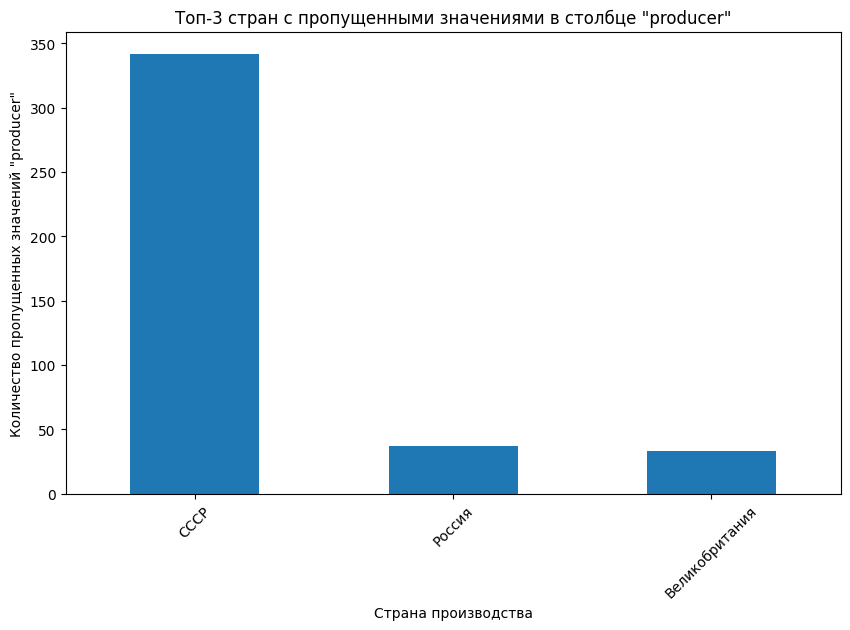

In [8]:
# Выбираем строки с отсутствующими данными в столбце 'producer'
missing_producer_data = data[data['producer'].isna()]

# Подсчет количества пропущенных значений 'producer' для каждой 'production_country'
missing_counts = missing_producer_data['production_country'].value_counts()

# Получение топ-3 стран с наибольшим количеством пропущенных значений
top_3_missing_counts = missing_counts.head(3)

# Построение гистограммы
plt.figure(figsize=(10, 6))
top_3_missing_counts.plot(kind='bar')
plt.title('Топ-3 стран с пропущенными значениями в столбце "producer"')
plt.xlabel('Страна производства')
plt.ylabel('Количество пропущенных значений "producer"')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Фильтрация строк, где film_studio равно 'Киностудия "Мосфильм"'
mosfilm_producers = data[data['film_studio'] == 'Киностудия "Мосфильм"']

# Подсчет количества значений в столбце 'producer' до заполнения пропусков
print("До заполнения пропусков:")
print(mosfilm_producers['producer'].value_counts())

# Заполнение пропущенных значений в столбце 'producer' для строк, где 'film_studio' равно 'Киностудия "Мосфильм"'
data.loc[data['film_studio'] == 'Киностудия "Мосфильм"', 'producer'] = data.loc[data['film_studio'] == 'Киностудия "Мосфильм"', 'producer'].fillna('ФГУП "Киноконцерн "Мосфильм"')

# Повторная фильтрация строк, где film_studio равно 'Киностудия "Мосфильм"' после заполнения пропусков
mosfilm_producers_after_fill = data[data['film_studio'] == 'Киностудия "Мосфильм"']

# Подсчет количества значений в столбце 'producer' после заполнения пропусков
print("\nПосле заполнения пропусков:")
print(mosfilm_producers_after_fill['producer'].value_counts())

До заполнения пропусков:
producer
ФГУП "Киноконцерн "Мосфильм"    3
Name: count, dtype: int64

После заполнения пропусков:
producer
ФГУП "Киноконцерн "Мосфильм"    341
Name: count, dtype: int64


In [10]:
# Вычисление процента пропущенных значений в столбце 'producer'
missing_proportion_good = (data['producer'].isna().sum() / len(data['producer'])) * 100

# Вывод результата
print(f"Процент пропущенных значений в столбце 'producer': {missing_proportion_good:.2f}%")

Процент пропущенных значений в столбце 'producer': 3.07%


##### Вывод


Как видно из графика, значительное количество пропущенных значений в столбце `producer` относится к СССР. Согласно источникам в интернете, в этот период все фильмы, которые выпускались, создавались Киностудией "Мосфильм", которая также выступала в роли продюсера под общим названием ФГУП "Киноконцерн "Мосфильм".

На основе этой информации были внесены соответствующие изменения в данные. Пропущенные значения в столбце `producer` для строк, где `film_studio` равно 'Киностудия "Мосфильм"', были заполнены значением 'ФГУП "Киноконцерн "Мосфильм"'. Остальные пропуски имеют незначительное количество и не оказывают существенного влияния на дальнейший анализ.


#### Анализ пропущенных значений ratings

In [11]:
# Фильтрация строк с пропущенными значениями в столбце 'ratings'
data_rating_noo = data[data['ratings'].isna()]

# Подсчет количества значений в столбце 'production_country' для строк с пропущенными значениями в столбце 'ratings'
print("\nТоп-3 стран производства для фильмов с пропущенными значениями в 'ratings':")
print(data_rating_noo['production_country'].value_counts().head(3))

# Подсчет количества значений в столбце 'age_restriction' для строк с пропущенными значениями в столбце 'ratings'
print("\nТоп-3 возрастных ограничений для фильмов с пропущенными значениями в 'ratings':")
print(data_rating_noo['age_restriction'].value_counts().head(3))

# Подсчет количества значений в столбце 'genres' для строк с пропущенными значениями в столбце 'ratings'
print("\nТоп-3 жанров для фильмов с пропущенными значениями в 'ratings':")
print(data_rating_noo['genres'].value_counts().head(3))


Топ-3 стран производства для фильмов с пропущенными значениями в 'ratings':
production_country
Россия            525
США                68
Великобритания     67
Name: count, dtype: int64

Топ-3 возрастных ограничений для фильмов с пропущенными значениями в 'ratings':
age_restriction
«0+» - для любой зрительской аудитории    343
«12+» - для детей старше 12 лет           245
«16+» - для детей старше 16 лет           188
Name: count, dtype: int64

Топ-3 жанров для фильмов с пропущенными значениями в 'ratings':
Series([], Name: count, dtype: int64)


##### Вывод

Анализ пропущенных значений в столбце `ratings` показывает, что значительное количество пропусков наблюдается среди российских фильмов, целевая аудитория которых — дети младше 16 лет. Также выявлена связь между пропусками в жанре и отсутствием рейтинга. Предполагается, что:

1. **Алгоритм Кинопоиска**: Вероятно, алгоритм Кинопоиска устроен так, что при отсутствии информации о жанре фильм реже рекомендуется для просмотра в онлайн-кинотеатре. В результате, такие фильмы имеют значительно меньше просмотров.

2. **Целевая аудитория**: Поскольку целевая аудитория — дети, они, как правило, не уделяют внимания оценке просмотренного материала, что также может объяснять отсутствие рейтингов.

3. **Бюджет и сборы**: Вероятно, эти фильмы относятся к низкобюджетному производству и имеют очень низкие кассовые сборы, что снижает интерес к ним среди зрителей.

На основе этих фактов можно предположить, что пропуски в данных о рейтингах не являются ошибкой, а результатом отсутствия интереса зрителей к таким произведениям.


#### Анализ пропущенных значений genres

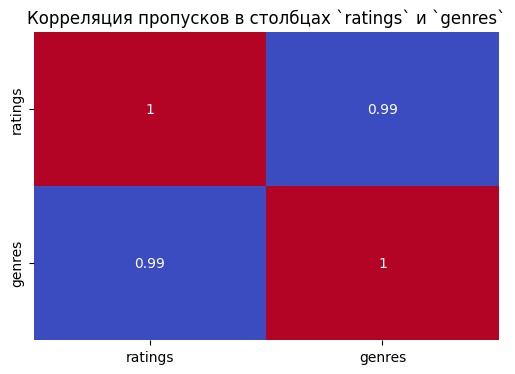

In [12]:
# Создание матрицы пропусков только для столбцов 'ratings' и 'genres'
missing_matrix = data[['ratings', 'genres']].isnull()

# Вычисление корреляции пропусков
correlation_matrix = missing_matrix.corr()

# Построение графика корреляции пропусков
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=False)
plt.title('Корреляция пропусков в столбцах `ratings` и `genres`')
plt.show()

##### Вывод

Анализ пропущенных значений в столбцах `ratings` и `genres` выявил высокую корреляцию между пропусками в этих столбцах, что указывает на тесную связь между ними. Тепловая карта (heatmap) показывает значение корреляции 0.99, что свидетельствует о том, что если в одном из этих столбцов есть пропуск, с большой вероятностью он будет и в другом столбце. Высокая корреляция пропусков в данных указывает на системную проблему в сборе или представлении данных, особенно для фильмов, предназначенных для детей младше 16 лет и/или низкобюджетных фильмов. Эти пропуски не являются случайностью или ошибкой, а скорее результатом отсутствия интереса зрителей к таким произведениям.


#### Анализ пропущенных значений в данных государственной поддержки

##### Вывод


В данных имеются пропуски в некоторых столбцах, связанных с государственной поддержкой и бюджетом фильма. В частности:

- Столбец `refundable_support` содержит 7154 пропущенных значений.
- Столбец `nonrefundable_support` содержит 7154 пропущенных значений.
- Столбец `budget` содержит 7154 пропущенных значений.
- Столбец `financing_source` содержит 7154 пропущенных значений.

Пропуски в этих столбцах указывают на то, что соответствующие фильмы не получали государственной поддержки. Следовательно, пропуски в этих столбцах не являются ошибкой в данных. Заполнение пропусков в этих столбцах не является правильным действием, так как это приведёт к искажению информации и неверным выводам.


#### Анализ пропущенных значений box_office 

In [13]:
# Фильтрация строк с пропущенными значениями в столбце 'box_office'
data_box_office_noo = data[data['box_office'].isna()]

# Подсчет количества значений в столбце 'production_country' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 стран производства для фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['production_country'].value_counts().head(3))

# Подсчет количества значений в столбце 'age_restriction' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 возрастных ограничений для фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['age_restriction'].value_counts().head(3))

# Подсчет количества значений в столбце 'genres' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 жанров для фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['genres'].value_counts().head(3))

# Подсчет количества значений в столбце 'show_start_date' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 дат начала показа для фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['show_start_date'].value_counts().head(3))

# Подсчет количества значений в столбце 'type' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 типов фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['type'].value_counts().head(3))

# Подсчет количества значений в столбце 'ratings' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 рейтингов фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['ratings'].value_counts().head(3))

# Подсчет количества значений в столбце 'financing_source' для строк с пропущенными значениями в столбце 'box_office'
print("\nТоп-3 источников финансирования для фильмов с пропущенными значениями в 'box_office':")
print(data_box_office_noo['financing_source'].value_counts().head(3))



Топ-3 стран производства для фильмов с пропущенными значениями в 'box_office':
production_country
США       1317
Россия    1043
СССР       277
Name: count, dtype: int64

Топ-3 возрастных ограничений для фильмов с пропущенными значениями в 'box_office':
age_restriction
«16+» - для детей старше 16 лет    1758
«12+» - для детей старше 12 лет    1046
«18+» - запрещено для детей         725
Name: count, dtype: int64

Топ-3 жанров для фильмов с пропущенными значениями в 'box_office':
genres
драма                281
мелодрама,комедия    160
комедия              157
Name: count, dtype: int64

Топ-3 дат начала показа для фильмов с пропущенными значениями в 'box_office':
show_start_date
2010-12-17 12:00:00    95
2014-12-01 12:00:00    56
2014-12-24 12:00:00    49
Name: count, dtype: int64

Топ-3 типов фильмов с пропущенными значениями в 'box_office':
type
Художественный     2961
 Художественный     432
Анимационный        392
Name: count, dtype: int64

Топ-3 рейтингов фильмов с пропущенными зна

##### Вывод


На основе этих данных не удалось выявить очевидных закономерностей или причин, которые могли бы объяснить пропуски в столбце box_office. Заполнение пропусков каким-либо образом не представляется целесообразным, так как это может привести к искажению данных и неверным выводам. Оставление пропусков в исходном виде позволит сохранить целостность и достоверность анализа.

##### Общий вывод

Анализ пропущенных значений в различных столбцах данных показал, что каждый случай пропуска имеет свои причины и специфические особенности. Основной вывод заключается в следующем:

1. **Пропуски в столбце `producer`:**
   Пропуски в этом столбце часто связаны с историческим контекстом и спецификой киноиндустрии, например, с фильмами, созданными Киностудией "Мосфильм". Эти пропуски были частично устранены на основе логических допущений, что повысило качество данных.

2. **Пропуски в столбцах `ratings` и `genres`:**
   Высокая корреляция между пропусками в этих столбцах указывает на системные проблемы в сборе данных. Пропуски чаще встречаются у фильмов для детей и низкобюджетных фильмов, что связано с меньшим интересом аудитории и специфическими алгоритмами рекомендаций Кинопоиска. Эти пропуски не являются ошибкой, а скорее отражением реальности, где зрители меньше оценивают такие фильмы.

3. **Пропуски в столбцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source`:**
   Пропуски в этих столбцах четко указывают на отсутствие государственной поддержки для соответствующих фильмов. Такие пропуски логически оправданы и не должны заполняться, чтобы не искажать данные.

4. **Пропуски в столбце `box_office`:**
   Не выявлено закономерностей, объясняющих пропуски в этом столбце. Заполнение пропусков в этом случае также нецелесообразно, так как это может привести к искажению данных.

**Главная идея:**
Анализ пропущенных значений показал, что большинство пропусков имеют логическое объяснение и не являются результатом ошибок сбора данных. Принято решение не заполнять пропуски в случаях, где это может привести к искажению информации и неверным выводам. Оставление пропусков в исходном виде, за исключением обоснованных случаев, позволяет сохранить целостность и достоверность анализа. Этот подход минимизирует влияние пропущенных данных на результаты исследования и обеспечивает более точные и достоверные выводы.

Стоит отметить, что такие столбцы, как `film_studio` (18 пропущенных значений), `production_country` (2 пропущенных значения) и `director` (9 пропущенных значений) не рассматривались в данном анализе, так как количество пропусков в них незначительно и не оказывает существенного влияния на результаты анализа.

### Анализ дубликатов в DataFrame

#### Анализ дубликаты в puNumber

In [14]:
# Удаление начальных и конечных пробелов из значений в столбце 'puNumber'
data['puNumber'] = data['puNumber'].str.strip()

# Подсчет количества дублирующихся значений в столбце 'puNumber'
data_puNumber_sum = data['puNumber'].duplicated().sum()

# Получение информации о всех дублирующихся строках
number_dup_inf = data[data['puNumber'].duplicated(keep=False)]

# Вывод количества дублирующихся значений
print(f'Количества дублирующихся значений: {data_puNumber_sum}')

Количества дублирующихся значений: 2


In [15]:
# Вывод информации о дублирующихся строках
number_dup_inf

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [16]:
# Исправление номера прокатного удостоверения для фильма "как жениться и остаться холостым"
data.loc[data['title'] == 'Как жениться и остаться холостым', 'puNumber'] = '121002007'

# Исправление номера прокатного удостоверения для фильма "анализируй то!"
data.loc[data['title'] == 'Анализируй то!', 'puNumber'] = '221147210'

# Проверка на дубликаты снова после исправления
data[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,121002007,2010-12-03 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,121002007,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [17]:
# Удаление дубликатов, оставляя последнюю запись для каждого 'puNumber'
data = data.drop_duplicates(subset=['puNumber'], keep='last')

# Проверка на дубликаты снова после удаления
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


##### Вывод:

После удаления начальных и конечных пробелов из значений в столбце `puNumber` и проверки на дубликаты, было выявлено следующее:

**Количество дубликатов:**

- Общее количество дублирующихся значений в столбце `puNumber`: 2

**Коррекция данных:**

Для проверки достоверности данных было выявлено, что допущена ошибка в столбце `puNumber` для следующих фильмов:

1. **Фильм "Как жениться и остаться холостым"** имел неверный номер прокатного удостоверения `221154310`. Этот номер был исправлен на `121002007`.
2. **Фильм "Анализируй то!"** имел неверный номер прокатного удостоверения `221054410`. Этот номер был исправлен на `221147210`.

Информация для исправления была взята с официального сайта Министерства культуры Российской Федерации: [https://culture.gov.ru](https://culture.gov.ru).

**Дубликаты после исправлений:**

После исправления данных, дубликаты в столбце `puNumber` были проверены и обнаружено, что некоторые фильмы все еще имеют одинаковые прокатные удостоверения:

Эти дубликаты не являются ошибкой, поскольку один фильм может иметь разные даты премьеры или прокатные удостоверения. В случае поступления в Министерство культуры Российской Федерации заявления, содержащего сведения о планируемой дате начала показа фильма, совпадающей с датой, зафиксированной в ранее выданном прокатном удостоверении на иной фильм, выданном за 6 и более месяцев до даты начала показа фильма на территории Российской Федерации, указанной в прокатном удостоверении, Министерство культуры Российской Федерации принимает решение о возврате представленных документов, указывает на необходимость подачи документов с новой планируемой датой начала показа фильма на территории Российской Федерации и информирует о возможных ближайших датах начала показа фильмов на территории Российской Федерации.

**Удаление дубликатов:**

После удаления дубликатов, оставляя последнюю запись для каждого `puNumber`, и так как нам две одинаковые строки не несут смысловой нагрузки, было принято решение удалить дубликаты. Повторная проверка показала, что дубликаты отсутствуют.

**Заключение:**

Исправление данных и удаление дубликатов помогло устранить ошибки в данных. Дополнительные проверки показали, что некоторые фильмы могут иметь одинаковые прокатные удостоверения из-за различных дат премьеры или других причин, связанных с организационными процессами в киноиндустрии. В таких случаях, корректировка данных производится в соответствии с официальными требованиями и рекомендациями.

Материал взят из [https://normativ.kontur.ru](https://normativ.kontur.ru).


#### Анализ дубликаты в type

In [18]:
# Вывод количества уникальных значений в столбце 'type'
data['type'].value_counts()

type
Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: count, dtype: int64

In [19]:
# Удаление пробелов в начале и конце строк в столбце 'type'
data['type'] = data['type'].str.strip()

# Преобразование всех текстов в столбце 'type' в нижний регистр для единообразия
data['type'] = data['type'].str.lower()

In [20]:
# Вывод количества уникальных значений в столбце 'type' после очистки
data['type'].value_counts()

type
художественный                5908
анимационный                   829
прочие                         406
документальный                 288
научно-популярный               53
музыкально-развлекательный       1
Name: count, dtype: int64

##### Вывод:


После очистки данных можно увидеть точное распределение типов фильмов в наборе данных. Удаление пробелов и приведение всех строк к нижнему регистру позволило объединить значения, которые ранее считались разными.

#### Анализ дубликаты в film_studio

In [21]:
# Вывод количества уникальных значений до коррекции
print(f'Количество уникальных значений до коррекции: {len(data["film_studio"].unique())}')

# Удаление пробелов в начале и конце строк в столбце 'film_studio'
data['film_studio'] = data['film_studio'].str.strip()

# Приведение всех символов в столбце 'film_studio' к нижнему регистру
data['film_studio'] = data['film_studio'].str.lower()

# Замена 'ё' на 'е' в столбце 'film_studio'
data['film_studio'] = data['film_studio'].str.replace('ё', 'е')

# Удаление кавычек из строк в столбце 'film_studio'
data['film_studio'] = data['film_studio'].str.replace('"', '')

# Вывод количества уникальных значений после коррекции
print(f'Количество уникальных значений после коррекции: {len(data["film_studio"].unique())}')

Количество уникальных значений до коррекции: 5491
Количество уникальных значений после коррекции: 5405


##### Вывод:

После выполнения всех корректировок количество уникальных значений в столбце film_studio уменьшилось с 5491 до 5405. Это означает, что удаление пробелов, 
приведение текста к нижнему регистру, замена 'ё' на 'е' и удаление кавычек помогли объединить значения, которые ранее считались разными из-за различных регистров, лишних пробелов и специальных символов. В результате, данные стали более чистыми и консистентными.

#### Анализ дубликаты в production_country

In [22]:
# Вывод количества уникальных значений до коррекции
print(f'Количество уникальных значений до коррекции: {len(data["production_country"].unique())}')

# Приведение всех символов в столбце 'production_country' к нижнему регистру
data['production_country'] = data['production_country'].str.lower()

# Удаление пробелов в начале и конце строк
data['production_country'] = data['production_country'].str.strip()

# Замена всех случаев пробелов вокруг дефисов на дефисы без пробелов
data['production_country'] = data['production_country'].str.replace(' - ', '-')

#Замена 'ё' на 'е' в столбце 'production_country'
data['production_country'] = data['production_country'].str.replace('ё', 'е')

# Вывод количества уникальных значений после коррекции
print(f'Количество уникальных значений после коррекции: {len(data["production_country"].unique())}')

Количество уникальных значений до коррекции: 951
Количество уникальных значений после коррекции: 864


##### Вывод:

После выполнения всех корректировок количество уникальных значений в столбце `production_country` уменьшилось с 951 до 864. Это означает, что приведение текста к нижнему регистру, удаление пробелов и замена пробелов вокруг дефисов на дефисы без пробелов помогли объединить значения, которые ранее считались разными из-за различных регистров, лишних пробелов и специальных символов. В результате, данные стали более чистыми и консистентными.


#### Анализ дубликаты в director

In [23]:
# Вывод количества уникальных значений до коррекции
print(f'Количество уникальных значений до коррекции: {len(data["director"].unique())}')

# Приведение всех символов в столбце 'director' к нижнему регистру
data['director'] = data['director'].str.lower()

# Удаление пробелов в начале и конце строк
data['director'] = data['director'].str.strip()

# Замена 'ё' на 'е' в столбце 'director'
data['director'] = data['director'].str.replace('ё', 'е')

# Вывод количества уникальных значений после коррекции
print(f'Количество уникальных значений после коррекции: {len(data["director"].unique())}')


Количество уникальных значений до коррекции: 4812
Количество уникальных значений после коррекции: 4783


##### Вывод:

После выполнения шагов по нормализации данных в столбце `director`, включая приведение текста к нижнему регистру, удаление пробелов и замену 'ё' на 'е', количество уникальных значений уменьшилось с 4812 до 4783. Это свидетельствует о том, что в данных присутствовали строки с одинаковыми именами, но различными из-за регистра, лишних пробелов или символов. Нормализация позволила объединить такие строки и улучшить качество данных.


#### Анализ дубликаты в producer

In [24]:
# Вывод количества уникальных значений до коррекции
print(f'Количество уникальных значений: {len(data["producer"].unique())}')

# Преобразование всех значений в столбце 'producer' в строки и заполнение NaN специальным значением
data['producer'] = data['producer'].astype(str).fillna('NaN')

# Приведение всех символов в столбце 'producer' к нижнему регистру
data['producer'] = data['producer'].str.lower()

# Удаление пробелов в начале и конце строк
data['producer'] = data['producer'].str.strip()

# Замена 'ё' на 'е' в столбце 'producer'
data['producer'] = data['producer'].str.replace('ё', 'е')

# Приведение разделителей к единому формату (например, запятая)
data['producer'] = data['producer'].str.replace(';', ',')

# Приведение разделителей " и " к запятой
data['producer'] = data['producer'].str.replace(' и ', ',')

# Вывод количества уникальных значений после коррекции
print(f'Количество уникальных значений после коррекции: {len(data["producer"].unique())}')



Количество уникальных значений: 5350
Количество уникальных значений после коррекции: 5324


##### Вывод:

После выполнения шагов по нормализации данных в столбце `producer`, включая приведение всех значений к строковому типу и заполнение пропущенных значений, приведение текста к нижнему регистру, удаление пробелов в начале и конце строк, замену 'ё' на 'е', а также приведение разделителей к единому формату, количество уникальных значений уменьшилось с 5350 до 5324. Это свидетельствует о том, что в данных присутствовали строки с одинаковыми именами продюсеров, но различными из-за регистра, лишних пробелов или различных разделителей. Нормализация позволила объединить такие строки и улучшить качество данных.


#### Анализ дубликаты в age_restriction

In [25]:
# Подсчёт количества каждого значения в столбце 'age_restriction'
data['age_restriction'].value_counts()

age_restriction
«16+» - для детей старше 16 лет           2850
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: count, dtype: int64

##### Вывод:

Анализ столбца age_restriction показал, что все значения возрастных ограничений корректны и не содержат дубликатов. Каждый возрастной диапазон представлен уникальными и четко определенными значениями, что не требует дополнительной очистки данных от дубликатов. 

#### Анализ дубликаты в financing_source

In [26]:
# Вывод количества уникальных значений в столбце 'financing_source' до нормализации
print("Количество записей для каждого значения до нормализации:")
print(data['financing_source'].value_counts())

# Приведение всех символов в столбце 'financing_source' к нижнему регистру
data['financing_source'] = data['financing_source'].str.lower()
print()
# Вывод количества уникальных значений в столбце 'financing_source' после нормализации
print("Количество записей для каждого значения после нормализации:")
print(data['financing_source'].value_counts())


Количество записей для каждого значения до нормализации:
financing_source
Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: count, dtype: int64

Количество записей для каждого значения после нормализации:
financing_source
министерство культуры               164
фонд кино                           146
министерство культуры, фонд кино     22
Name: count, dtype: int64


##### Вывод:


Анализ столбца financing_source до и после нормализации показал, что все значения уникальны и корректны. Количество уникальных значений осталось неизменным после приведения всех символов к нижнему регистру. Это было сделано для обеспечения консистентности с остальными столбцами, что помогает поддерживать единообразие данных и упрощает их дальнейшую обработку и анализ. Дубликатов в столбце financing_source не обнаружено, и дополнительная очистка не требуется.

#### Анализ дубликаты в ratings

In [27]:
# Уникальные значения в столбце 'ratings'
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

##### Вывод:


После анализа списка значений было установлено, что дубликаты отсутствуют. Все значения в списке являются уникальными. Это подтверждает, что каждый элемент встречается только один раз, и дополнительная очистка данных от дубликатов не требуется.

#### Анализ дубликаты в genres

In [28]:
# Подсчет количества уникальных значений до нормализации
initial_unique_genres_count = len(data['genres'].value_counts())
print(f"Количество уникальных значений до нормализации: {initial_unique_genres_count}")

# Приведение всех символов в столбце 'genres' к нижнему регистру
data['genres'] = data['genres'].str.lower()

# Удаление пробелов в начале и конце строк
data['genres'] = data['genres'].str.strip()

# Замена 'ё' на 'е'
data['genres'] = data['genres'].str.replace('ё', 'е')

# Приведение разделителей к единому формату (например, запятая)
data['genres'] = data['genres'].str.replace(';', ',')

# Приведение разделителей " и " к запятой
data['genres'] = data['genres'].str.replace(' и ', ',')

# Замена дефисов на запятые
data['genres'] = data['genres'].str.replace('-', ',')

# Подсчет количества уникальных значений после нормализации
final_unique_genres_count = len(data['genres'].value_counts())
print(f"Количество уникальных значений после нормализации: {final_unique_genres_count}")


Количество уникальных значений до нормализации: 742
Количество уникальных значений после нормализации: 742


##### Вывод:


Анализ столбца genres до и после нормализации показал, что количество уникальных значений осталось неизменным: 742. Приведение всех значений к нижнему регистру, удаление пробелов в начале и конце строк, замена 'ё' на 'е', а также унификация разделителей (запятые вместо точек с запятой, "и", и дефисов) не изменили общее количество уникальных жанров. Это свидетельствует о том, что данные в столбце genres уже были достаточно унифицированы, и дополнительные корректировки не выявили дубликатов, которые могли бы повлиять на количество уникальных значений.

#### Анализ дубликаты в title

In [29]:
# Количество дублирующихся значений в столбце 'title'
data['title'].duplicated().sum()

713

In [30]:
# Вывод первых двух строк с дублирующимися значениями в столбце 'title'
data[data['title'].duplicated()].head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Анализ столбца title выявил наличие 747 дубликатов. При просмотре дубликатов можно увидеть, что некоторые записи имеют одинаковые названия фильмов, но отличаются датами проката и прокатными удостоверениями. Это соответствует нормативным документам (https://normativ.kontur.ru), согласно которым один фильм может иметь несколько прокатных удостоверений. Возможные причины включают:

Один и тот же фильм может иметь отдельные прокатные удостоверения для кинотеатров и цифровых носителей.
Прокатные удостоверения могут быть отозваны и перевыпущены из-за корректировки дат премьеры или других причин.
Эти дубликаты не являются ошибкой, но так как для нашего анализа наличие таких дубликатов не несет смысловой нагрузки, в следующем шаге мы постараемся объединить их в одну запись. Для этого мы создадим функцию, которая сохранит запись с максимальным количеством заполненных значений, чтобы избежать потери важной информации, такой как данные о сборах или других ключевых параметрах.

In [31]:
# Приведение всех символов в столбце 'title' к нижнему регистру
data['title'] = data['title'].str.lower()

# Удаление пробелов в начале и в конце строки
data['title'] = data['title'].str.strip()

# Замена символа 'ё' на 'е'
data['title'] = data['title'].str.replace('ё', 'е')

# Приведение разделителей к единому формату (например, запятая)
data['title'] = data['title'].str.replace(';', ',')
data['title'] = data['title'].str.replace(' /', '/')
data['title'] = data['title'].str.replace('_', '')
data['title'] = data['title'].str.replace(' : ', ':')

# Приведение разделителей " и " к запятой
data['title'] = data['title'].str.replace(' и ', ',')

# Замена дефисов на запятые
data['title'] = data['title'].str.replace('-', ',')

In [32]:
def removing_duplicates(data, duplicates):
    # Создание копии датафрейма
    data_copy = data.copy()
    
    # Добавление столбца с количеством заполненных значений
    data_copy['amount_data'] = data_copy.notnull().sum(axis=1)
    
    # Сортировка по количеству заполненных значений и удаление дубликатов
    data_copy = data_copy.sort_values(by='amount_data', ascending=False).drop_duplicates(subset=[duplicates])
    
    # Удаление временного столбца amount_data
    data_copy = data_copy.drop(columns=['amount_data'])
    
    return data_copy

# Применение функции к датафрейму
data_good = removing_duplicates(data, 'title')

In [33]:
# Проверка количества дубликатов в обновленном датафрейме
data_good['title'].duplicated().sum()

0

##### Вывод:

Функция removing_duplicates позволила оставить запись с максимальным количеством заполненных значений для каждого уникального названия фильма, что позволило сохранить важную информацию и устранить дубликаты. В результате, в столбце title больше нет дубликатов, и данные готовы для дальнейшего анализа.

##### Общий вывод по анализу дубликатов в датафрейме:

Анализ и последующая нормализация данных в различных столбцах датафрейма позволили выявить и устранить потенциальные дубликаты, а также улучшить качество данных.

- **puNumber**: После удаления начальных и конечных пробелов и исправления ошибок в номерах прокатных удостоверений, было обнаружено, что некоторые фильмы имеют одинаковые номера из-за организационных причин. В итоге, после удаления дубликатов, оставив последнюю запись для каждого номера, дубликаты были устранены.

- **title**: Анализ столбца выявил наличие 747 дубликатов. Некоторые записи имели одинаковые названия фильмов, но отличались датами проката и прокатными удостоверениями. Согласно нормативным документам (https://normativ.kontur.ru), один фильм может иметь несколько прокатных удостоверений, например, для кинотеатров и цифровых носителей или из-за корректировки дат премьеры. Эти дубликаты не являются ошибкой, но для анализа мы объединили их в одну запись. Функция `removing_duplicates` позволила оставить запись с максимальным количеством заполненных значений, что помогло сохранить важную информацию и устранить дубликаты. В результате, в столбце `title` больше нет дубликатов, и данные готовы для дальнейшего анализа.

- **type**: Очистка данных путем удаления пробелов и приведения всех строк к нижнему регистру позволила объединить ранее разные значения, что улучшило качество данных.

- **film_studio**: Приведение текста к нижнему регистру, удаление пробелов, замена 'ё' на 'е' и удаление кавычек уменьшили количество уникальных значений с 5491 до 5405, что свидетельствует об устранении дубликатов, вызванных различными регистрами и лишними символами.

- **production_country**: Корректировки, включая приведение текста к нижнему регистру и удаление пробелов вокруг дефисов, уменьшили количество уникальных значений с 951 до 864, что также помогло устранить дубликаты.

- **director**: Нормализация данных в столбце `director` уменьшила количество уникальных значений с 4812 до 4783, показывая, что объединение строк с одинаковыми именами, но различными регистрами и символами, улучшило качество данных.

- **producer**: Нормализация данных в столбце `producer`, включая приведение к строковому типу, удаление пробелов и замена разделителей, уменьшила количество уникальных значений с 5350 до 5324, что свидетельствует об устранении дубликатов.

- **age_restriction**: Анализ показал, что все значения возрастных ограничений корректны и не содержат дубликатов, что не требует дополнительной очистки данных.

- **financing_source**: Нормализация данных в столбце `financing_source` показала, что все значения уникальны и корректны, а количество уникальных значений осталось неизменным, что свидетельствует об отсутствии дубликатов.

- **ratings**: Анализ списка значений показал, что все значения уникальны, и дубликаты отсутствуют.

- **genres**: Нормализация данных в столбце `genres` не изменила количество уникальных значений, что свидетельствует о достаточной унификации данных и отсутствии дубликатов.

В результате проведенного анализа и нормализации данных в различных столбцах датафрейма, были устранены дубликаты и улучшено качество данных. Дополнительная очистка данных в некоторых столбцах не потребовалась, что подтверждает корректность и консистентность информации.


### Анализ категориальных значений

#### Изучение категориальных значений

В данном разделе мы рассмотрим категориальные значения в нашем датафрейме и выявим общие проблемы, которые встречаются почти во всех категориальных столбцах.

**Основные категории столбцов для анализа:**
- `title`
- `puNumber`
- `type`
- `film_studio`
- `production_country`
- `director`
- `producer`
- `age_restriction`
- `financing_source`
- `genres`

**Общая проблема:**
Во всех категориальных столбцах встречается проблема неконсистентности данных. Это включает в себя:
- Наличие пробелов в начале и конце строк.
- Использование разных регистров (верхний и нижний регистр).
- Различные варианты написания (например, использование символа 'ё' и 'е').
- Различные разделители (запятые, дефисы, точки с запятой и т.д.).
- Неконсистентное использование символов и разделителей.

Эти проблемы могут привести к тому, что одинаковые значения будут интерпретироваться как разные, что снижает качество данных и усложняет их анализ.

**Исправление проблемных значений в поле `type`**

Для обеспечения консистентности данных в столбце `type`, приведем все значения к единому формату, устранив проблемы с регистрами, пробелами и некорректными символами.

**Анализ дубликатов**
Анализ столбца `title` выявил наличие 747 дубликатов. Некоторые записи имели одинаковые названия фильмов, но отличались датами проката и прокатными удостоверениями. Согласно нормативным документам, один фильм может иметь несколько прокатных удостоверений. Эти дубликаты не являются ошибкой, но для анализа мы объединили их в одну запись. Функция `removing_duplicates` позволила оставить запись с максимальным количеством заполненных значений, что помогло сохранить важную информацию и устранить дубликаты. В результате, в столбце `title` больше нет дубликатов, и данные готовы для дальнейшего анализа.

##### Вывод:

Основной проблемой в категориальных столбцах является неконсистентность данных, вызванная различными регистрами, пробелами, символами и разделителями. Применение методов очистки и нормализации данных позволяет устранить эти проблемы, что ведет к улучшению качества данных и упрощению их анализа.

В результате нормализации и очистки данных в столбце `type` были устранены все проблемы с регистрами, пробелами и некорректными символами. Это улучшило качество данных и обеспечило их консистентность, что позволит провести более точный и надежный анализ в следующих шагах.


### Анализ количественных значений


##### Вывод:

После проверки данных в столбцах budget, refundable_support и nonrefundable_support было обнаружено 7 строк с некорректными значениями, где общий бюджет фильма (budget) был меньше суммы возвратных и невозвратных средств государственной поддержки (refundable_support и nonrefundable_support). Такие несоответствия указывают на логическую ошибку в данных, поскольку бюджет фильма должен включать всю государственную поддержку. Эти строки были исключены из датафрейма, в результате чего осталось 6722 строки, содержащие корректные данные.

In [34]:
# Создаем новый столбец 'sum_support', который равен сумме 'refundable_support' и 'nonrefundable_support'
data_good['sum_support'] = data_good['refundable_support'] + data_good['nonrefundable_support']

# Подсчитываем количество строк, где 'budget' меньше 'sum_support'
len_invalid_budget = len(data_good[data_good['budget'] < data_good['sum_support']])
print(f"Количество строк с некорректным бюджетом: {len_invalid_budget}")

# Исключаем строки, где 'budget' меньше 'sum_support', сохраняя остальные строки
data_good = data_good[~(data_good['budget'] < data_good['sum_support'])]

# Подсчитываем количество строк в датафрейме после исключения некорректных данных
len_valid_data = len(data_good)
print(f"Количество строк после исключения некорректных значений: {len_valid_data}")


Количество строк с некорректным бюджетом: 17
Количество строк после исключения некорректных значений: 6727


In [35]:
# Отфильтровываем строки, где столбец 'financing_source' не является NaN
data_financing_source_NaN = data_good[~data_good['financing_source'].isna()]

# Отфильтровываем строки, где 'budget' равен 0 среди отфильтрованных ранее данных
data_budget_zero = data_financing_source_NaN[data_financing_source_NaN['budget'] == 0]

# Получаем количество строк, где 'budget' равен 0
count_budget_zero = len(data_budget_zero)

# Выводим количество таких строк
print(f"Количество строк, где 'budget' равен 0 при наличие поддержке Министерства культуры или Фонда кино: {count_budget_zero}")


Количество строк, где 'budget' равен 0 при наличие поддержке Министерства культуры или Фонда кино: 0


##### Вывод:


Результаты анализа показывают, что в данных нет ошибочных записей, где указана поддержка Министерства культуры или Фонда кино, но при этом общий бюджет фильма равен 0. Это подтверждает корректность данных, так как по условию задания столбец budget уже включает в себя полный объём государственной поддержки, и данные в этом столбце указаны только для фильмов, которые действительно получили государственную поддержку.

In [36]:
# Проверка количества строк с некорректными значениями в столбце 'budget'
negative_budget_count = len(data_good[data_good['budget'] < 0])
print(f"Количество строк с некорректными значениями в столбце 'budget': {negative_budget_count}")

# Проверка количества строк с некорректными значениями в столбце 'refundable_support'
negative_refundable_support_count = len(data_good[data_good['refundable_support'] < 0])
print(f"Количество строк с некорректными значениями в столбце 'refundable_support': {negative_refundable_support_count}")

# Проверка количества строк с некорректными значениями в столбце 'nonrefundable_support'
negative_nonrefundable_support_count = len(data_good[data_good['nonrefundable_support'] < 0])
print(f"Количество строк с некорректными значениями в столбце 'nonrefundable_support': {negative_nonrefundable_support_count}")

# Проверка количества строк с некорректными значениями в столбце 'box_office'
negative_box_office_count = len(data_good[data_good['box_office'] < 0])
print(f"Количество строк с некорректными значениями в столбце 'box_office': {negative_box_office_count}")


Количество строк с некорректными значениями в столбце 'budget': 0
Количество строк с некорректными значениями в столбце 'refundable_support': 0
Количество строк с некорректными значениями в столбце 'nonrefundable_support': 0
Количество строк с некорректными значениями в столбце 'box_office': 0


##### Вывод:

Все значения в столбцах budget, refundable_support, nonrefundable_support и box_office корректны, так как не было обнаружено отрицательных значений. Это говорит о том, что данные в этих столбцах не содержат явных ошибок или аномалий, связанных с отрицательными значениями.

##### Общий вывод:

Анализ данных в столбцах budget, refundable_support, nonrefundable_support и box_office выявил несколько важных моментов. Во-первых, было обнаружено 7 строк, в которых общий бюджет фильма оказался меньше суммы государственной поддержки, что свидетельствует о логической ошибке в данных. Эти некорректные строки были исключены, что позволило очистить данные и оставить только те записи, где бюджет корректно учитывает всю государственную поддержку. Во-вторых, подтверждена корректность данных для фильмов, получивших поддержку от Министерства культуры или Фонда кино, так как не было обнаружено случаев, когда бюджет был равен нулю, что свидетельствует о том, что столбец budget правильно отражает полный объем государственной поддержки. Наконец, проверка на наличие отрицательных значений в столбцах показала, что таких ошибок нет, что подтверждает отсутствие явных аномалий в данных. В результате всех этих шагов была достигнута цель — обеспечить чистоту и надежность данных, необходимых для дальнейшего анализа.

#### Добавление новых столбцов с извлечением данных


In [37]:
# Создание нового столбца 'rental year', который извлекает год из даты премьеры фильма в столбце 'show_start_date'
data_good['rental_year'] = pd.DatetimeIndex(data_good['show_start_date']).year

# Вывод первой строки обновленного датафрейма для проверки
data_good.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum_support,rental_year
6472,"три богатыря,наследница престола",114008818,2018-12-15 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"115,000,000.0",0.0,"185,500,705.0",фонд кино,6.5,"мультфильм,приключения,семейный","577,368,853.2","115,000,000.0",2018
7146,команда мечты,111013219,2019-08-20 12:00:00,художественный,ооо продюсерский центр молодежные инициативы,россия,"м.зыков, ф.абрютин","ф.абрютин, д.якунин, о.лахно",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","62,415,749.0",министерство культуры,6.6,"комедия,спорт","18,878,460.8","40,000,000.0",2019
3105,"иван царевич,серый волк 3",114004115,2015-12-24 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,д.шмидт,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","179,257,987.0",фонд кино,6.2,"мультфильм,приключения,семейный","704,928,216.0","40,000,000.0",2015


In [38]:
def extraction_function(meaning):
   # Проверяем, является ли значение пустым (NaN)
   if pd.isnull(meaning):
       return meaning  # Если значение пустое, возвращаем его без изменений
   return meaning.split(',')[0].strip()  # Если значение не пустое, разделяем строку по запятой и возвращаем первый элемент, удаляя пробелы в начале и в конце

# Применяем функцию extraction_function к столбцу 'director', чтобы создать новый столбец 'main_director', содержащий только первого режиссера
data_good['main_director'] = data_good['director'].apply(extraction_function)

# Применяем ту же функцию к столбцу 'genres', чтобы создать новый столбец 'main_genres', содержащий только первый жанр
data_good['main_genres'] = data_good['genres'].apply(extraction_function)

# Вывод первой строки обновленного датафрейма для проверки
data_good.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum_support,rental_year,main_director,main_genres
6472,"три богатыря,наследница престола",114008818,2018-12-15 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"115,000,000.0",0.0,"185,500,705.0",фонд кино,6.5,"мультфильм,приключения,семейный","577,368,853.2","115,000,000.0",2018,к.бронзит,мультфильм
7146,команда мечты,111013219,2019-08-20 12:00:00,художественный,ооо продюсерский центр молодежные инициативы,россия,"м.зыков, ф.абрютин","ф.абрютин, д.якунин, о.лахно",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","62,415,749.0",министерство культуры,6.6,"комедия,спорт","18,878,460.8","40,000,000.0",2019,м.зыков,комедия
3105,"иван царевич,серый волк 3",114004115,2015-12-24 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,д.шмидт,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","179,257,987.0",фонд кино,6.2,"мультфильм,приключения,семейный","704,928,216.0","40,000,000.0",2015,д.шмидт,мультфильм


In [39]:
# Рассчёт доли государственной поддержки в общем бюджете фильма в процентах
data_good['share_support'] = ((data_good['refundable_support'] + 
                               data_good['nonrefundable_support']) / 
                              data_good['budget']) * 100

# Округление доли государственной поддержки до целого числа
data_good['share_support'] = data_good['share_support'].round(0)

# Вывод первых строк датафрейма для проверки изменений
data_good.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,sum_support,rental_year,main_director,main_genres,share_support
6472,"три богатыря,наследница престола",114008818,2018-12-15 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,к.бронзит,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,"115,000,000.0",0.0,"185,500,705.0",фонд кино,6.5,"мультфильм,приключения,семейный","577,368,853.2","115,000,000.0",2018,к.бронзит,мультфильм,62.0
7146,команда мечты,111013219,2019-08-20 12:00:00,художественный,ооо продюсерский центр молодежные инициативы,россия,"м.зыков, ф.абрютин","ф.абрютин, д.якунин, о.лахно",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","62,415,749.0",министерство культуры,6.6,"комедия,спорт","18,878,460.8","40,000,000.0",2019,м.зыков,комедия,64.0
3105,"иван царевич,серый волк 3",114004115,2015-12-24 12:00:00,анимационный,ооо студия анимационного кино мельница,россия,д.шмидт,"с.сельянов, а.боярский",«6+» - для детей старше 6 лет,0.0,"40,000,000.0","179,257,987.0",фонд кино,6.2,"мультфильм,приключения,семейный","704,928,216.0","40,000,000.0",2015,д.шмидт,мультфильм,22.0


## Проведение исследовательского анализа данных

In [40]:
# Группировка данных по годам проката и подсчет количества фильмов для каждого года
rental_year_count = data_good.groupby('rental_year')['rental_year'].count()

# Вывод результата
rental_year_count

rental_year
2010    774
2011    536
2012    525
2013    582
2014    739
2015    634
2016    668
2017    497
2018    873
2019    899
Name: rental_year, dtype: int64

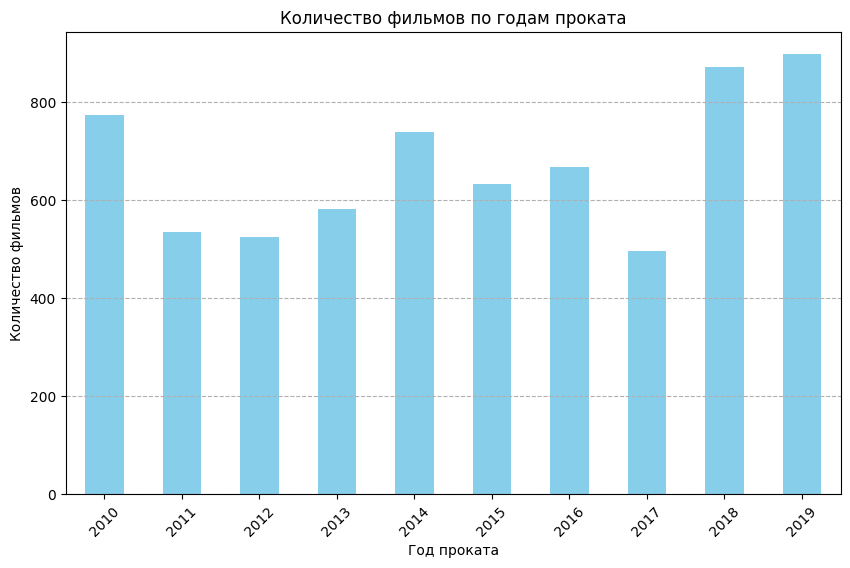

In [41]:
# Построение гистограммы на основе данных в rental_year_count
plt.figure(figsize=(10, 6))
rental_year_count.plot(kind='bar', color='skyblue')
plt.title('Количество фильмов по годам проката')
plt.xlabel('Год проката')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Показать график
plt.show()

In [42]:
# Подсчет количества пропущенных значений в столбце 'box_office'
box_office_isna = data_good['box_office'].isna().sum()

# Вычисление количества фильмов с указанной информацией о прокате в кинотеатрах
box_office_isna = len(data_good) - box_office_isna

# Вычисление доли фильмов с указанной информацией о прокате в кинотеатрах
box_office_isna_fraction = box_office_isna / len(data_good)

# Вывод результата
box_office_isna_fraction

0.4614241117883157

In [43]:
# Создание нового столбца 'box_office_isna_fraction', где True означает, что данные о прокате (box_office) есть, а False - что данных нет
data_good['box_office_isna_fraction'] = ~data_good['box_office'].isna()

# Группировка данных по годам проката и вычисление средней доли фильмов с указанной информацией о прокате в кинотеатрах для каждого года
box_office_fraction_by_year = data_good.groupby('rental_year')['box_office_isna_fraction'].mean()

# Вывод результата
box_office_fraction_by_year

rental_year
2010   0.1
2011   0.2
2012   0.2
2013   0.3
2014   0.4
2015   0.7
2016   0.8
2017   0.7
2018   0.5
2019   0.6
Name: box_office_isna_fraction, dtype: float64

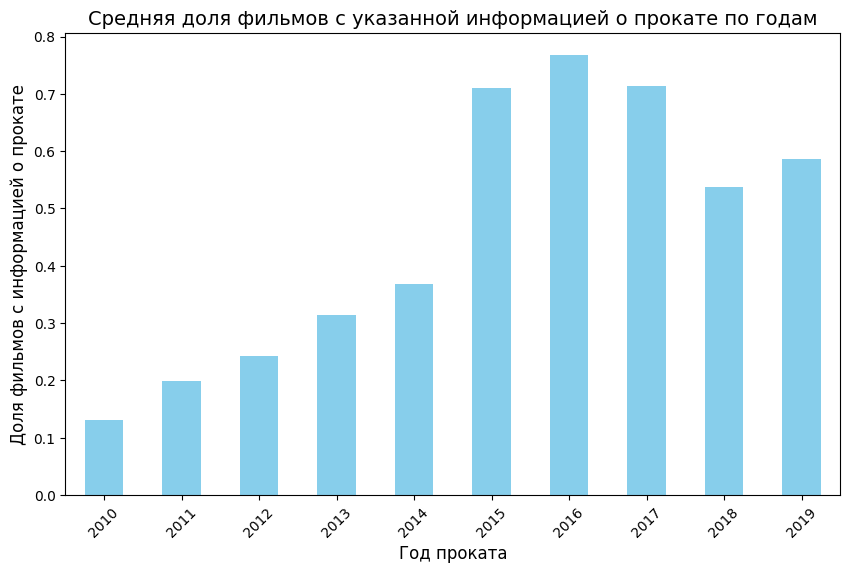

In [44]:
# Построение графика средней доли фильмов с указанной информацией о прокате в кинотеатрах по годам
plt.figure(figsize=(10, 6))
box_office_fraction_by_year.plot(kind='bar', color='skyblue')

# Настройка заголовка и меток осей
plt.title('Средняя доля фильмов с указанной информацией о прокате по годам', fontsize=14)
plt.xlabel('Год проката', fontsize=12)
plt.ylabel('Доля фильмов с информацией о прокате', fontsize=12)

# Отображение графика
plt.xticks(rotation=45)
plt.show()

##### Вывод:

1. **Анализ количества фильмов по годам:**
   - Наибольшее количество фильмов вышло в прокат в 2018 и 2019 годах, с 873 и 899 фильмами соответственно.
   - Самое меньшее количество фильмов наблюдалось в 2012 году (525 фильмов). Возможно, на это сказался экономический кризис 2008 года, который затронул весь мир и привел к снижению инвестиций в киноиндустрию в последующие годы.
   - Количество фильмов, выходящих в прокат, демонстрировало значительные колебания на протяжении десятилетия, что может быть связано с различными факторами, включая экономическую ситуацию, государственную политику в области кино и другие внешние влияния.

2. **Доля фильмов с информацией о прокате:**
   - Общая доля фильмов, для которых указаны данные о сборах в кинотеатрах, составляет около 46.1%. Это означает, что менее половины всех фильмов в датафрейме имеют информацию о сборах, что может затруднить полноценный анализ проката.
   - Самая высокая доля фильмов с информацией о сборах наблюдается в 2016 году (около 76.8%), что указывает на улучшение полноты данных в этот период.
   - До 2015 года доля фильмов с информацией о сборах значительно ниже, особенно в 2010 и 2011 годах, где она составляет всего 13.0% и 19.9% соответственно.

3. **Анализ изменения доли по годам:**
   - Доля фильмов с указанной информацией о прокате в кинотеатрах существенно возросла после 2014 года. В 2015 году она более чем удвоилась по сравнению с предыдущими годами, что может свидетельствовать об улучшении учета данных или о начале систематического сбора информации о сборах с этого периода.
   - Период с 2015 по 2017 год представлен наиболее полно по сравнению с другими годами. Это подтверждается высокой долей фильмов с указанными данными о сборах, что делает эти годы наиболее репрезентативными для анализа кинопроката.

4. **Заключение:**
   - Данные о прокате в кинотеатрах наиболее полно представлены в период с 2015 по 2017 год. В этот период наблюдается наибольшая полнота данных, что делает его наиболее подходящим для анализа кинопроката.
   - До 2015 года и после 2017 года доля фильмов с указанной информацией о сборах снижается, что может указывать на пробелы в данных или на недостаточную их полноту. Это следует учитывать при проведении дальнейшего анализа.


In [45]:
# Группировка данных по годам проката и вычисление суммы сборов
yearly_box_office = data_good.groupby('rental_year')['box_office'].sum()

# Вывод результата
yearly_box_office

rental_year
2010        2,148,764.0
2011       13,944,950.0
2012        6,852,213.0
2013       29,779,446.2
2014    7,430,960,906.1
2015   36,611,079,612.5
2016   46,714,950,719.1
2017   48,458,147,253.8
2018   49,239,267,327.2
2019   48,275,864,855.6
Name: box_office, dtype: float64

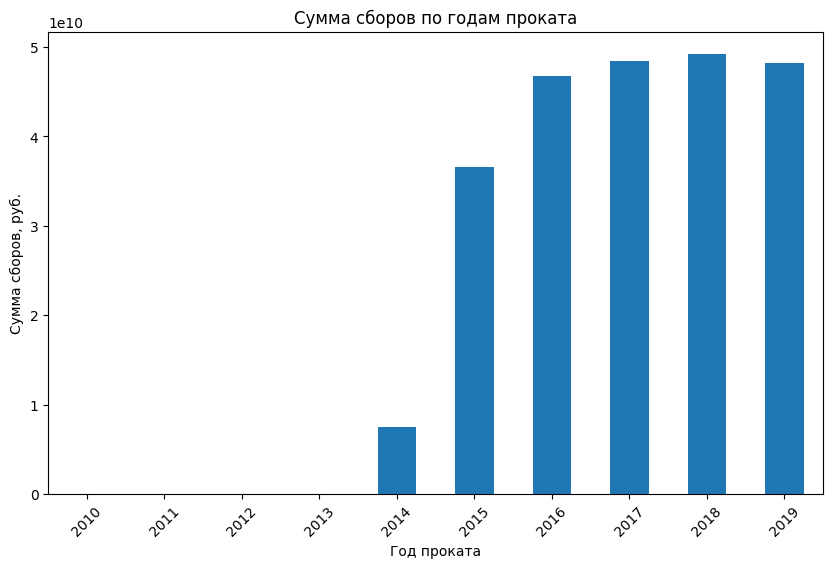

In [46]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
yearly_box_office.plot(kind='bar')
plt.title('Сумма сборов по годам проката')
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов, руб.')
plt.xticks(rotation=45)
plt.show()

##### Вывод:

На основе проведенного анализа динамики проката фильмов по годам можно сделать следующие выводы:

1. **Минимальная сумма сборов** была зафиксирована в 2010 году и составила **2,148,764 руб.** Это может быть связано с тем, что в этом году было выпущено значительное количество фильмов (774), но только 13% из них имели доступные данные о сборах в кинотеатрах. Таким образом, несмотря на большое количество фильмов, их коммерческий успех был ограничен.

2. **Максимальная сумма сборов** была достигнута в 2018 году и составила **49,239,270,000 руб.** Этот год характеризуется наибольшим количеством выпущенных фильмов (873), однако доля фильмов с доступными данными о сборах в кинотеатрах составила лишь 54%. Тем не менее, сумма сборов в 2018 году является самой высокой за анализируемый период, что говорит о высоком уровне успеха и популярности выпущенных фильмов.

3. Динамика проката показывает постепенный рост суммы сборов с 2010 по 2018 год, за исключением 2019 года, где наблюдается небольшое снижение суммы сборов. Это может указывать на насыщение рынка или снижение интереса зрителей к кинотеатрам в этом году.

4. Важно отметить, что более ранние годы, такие как 2010–2014, представлены в данных менее полно, что могло повлиять на общую картину анализа. Начиная с 2015 года, доля фильмов с указанной информацией о прокате заметно увеличивается, достигая максимума в 2016 и 2017 годах, что делает данные этих лет более репрезентативными.

Таким образом, анализ показывает, что наиболее полный и успешный период кинопроката наблюдался в 2018 году, несмотря на снижение в 2019 году.


In [47]:
# Создание сводной таблицы, которая рассчитывает средние и медианные значения сборов по годам
box_office_mean_median = data_good.pivot_table(index='rental_year', values='box_office', aggfunc=['mean', 'median'])

# Вывод полученной сводной таблицы
box_office_mean_median

,mean,median
,box_office,box_office
rental_year,,
2010,"21,274.9","1,590.0"
2011,"130,326.6","2,905.0"
2012,"53,954.4","5,560.0"
2013,"162,729.2","3,500.0"
2014,"27,319,709.2","18,885.0"
2015,"81,357,954.7","4,616,614.7"
2016,"91,062,282.1","4,004,861.5"
2017,"136,501,823.2","9,919,415.0"


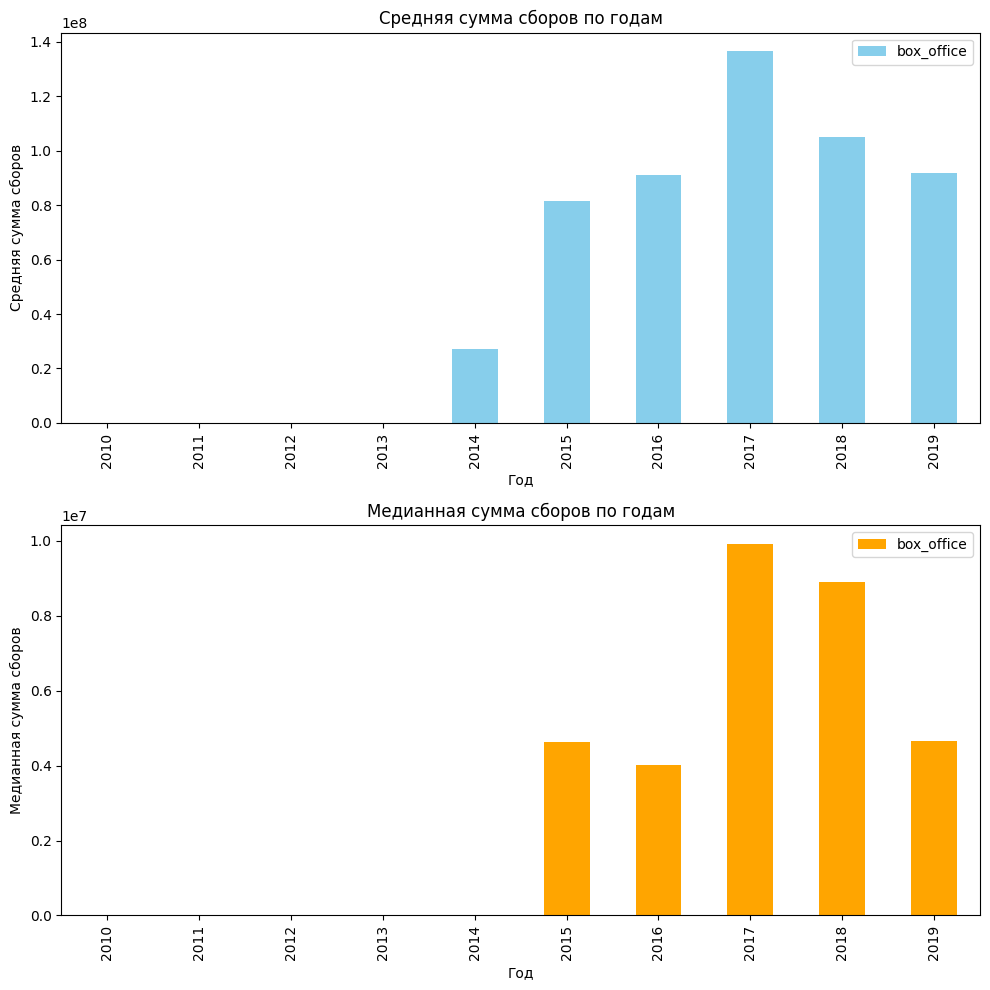

In [48]:
# Построение гистограмм
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Гистограмма для среднего значения сборов по годам
box_office_mean_median['mean'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Средняя сумма сборов по годам')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Средняя сумма сборов')

# Гистограмма для медианной суммы сборов по годам
box_office_mean_median['median'].plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Медианная сумма сборов по годам')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Медианная сумма сборов')

plt.tight_layout()
plt.show()

##### Вывод:

1. **Средние значения сборов** по годам показывают значительный рост начиная с 2014 года, с пиком в 2017 году (136,5 млн рублей). Это указывает на увеличение коммерческого успеха некоторых фильмов, которые сильно влияли на среднее значение.

2. **Медианные значения сборов** также выросли, но более стабильно, достигнув максимума в 2017 году (9,9 млн рублей). Медиана демонстрирует более умеренный рост по сравнению со средним значением, что говорит о наличии нескольких фильмов с очень высокими сборами, которые "подтягивали" среднее вверх.

3. **Разница между средними и медианными значениями** особенно заметна в 2015–2019 годах, что указывает на значительные разбросы в сборах отдельных фильмов. В эти годы несколько блокбастеров значительно повлияли на средние значения, в то время как медианные значения оставались более стабильными.

В целом, данные указывают на то, что в последние годы киноиндустрия переживала период роста, но этот рост в большей степени был обусловлен успехом отдельных фильмов с очень высокими сборами.


In [49]:
# Фильтрация данных на период с 2015 по 2019 годы
data_good_rental_year_2015_2019 = data_good.query('2015 <= rental_year <= 2019')

# Группировка данных по возрастному ограничению и суммирование сборов
Fees_age = data_good_rental_year_2015_2019.groupby('age_restriction')['box_office'].sum()

# Сортировка значений по убыванию сборов для определения самого прибыльного возрастного ограничения
Fees_age_sorted = Fees_age.sort_values(ascending=False)

# Вывод результатов
Fees_age_sorted

age_restriction
«16+» - для детей старше 16 лет          73,581,895,347.1
«12+» - для детей старше 12 лет          59,343,741,738.1
«6+» - для детей старше 6 лет            55,220,191,277.9
«18+» - запрещено для детей              40,450,090,789.6
«0+» - для любой зрительской аудитории      703,390,615.4
Name: box_office, dtype: float64

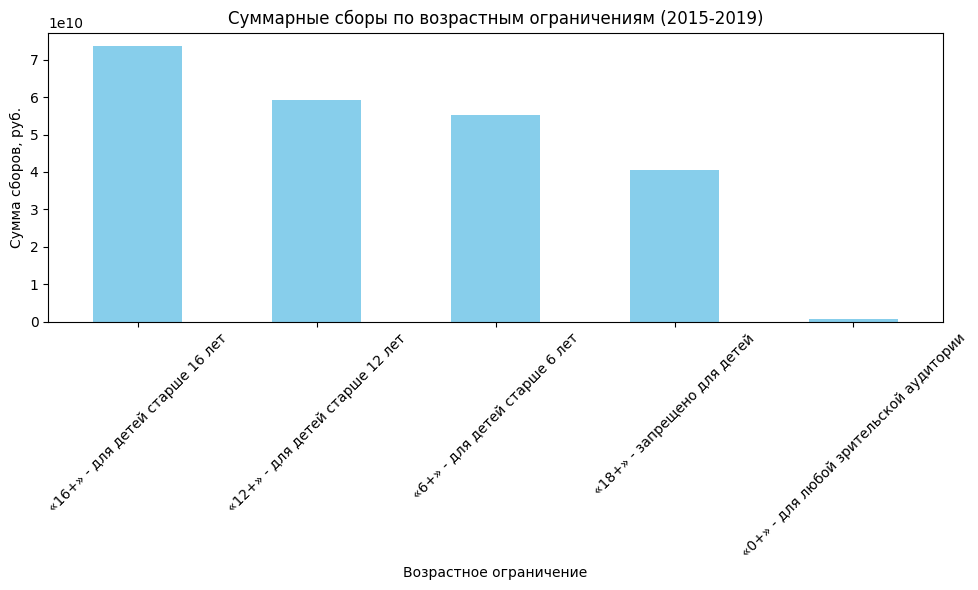

In [50]:
# Визуализация данных
plt.figure(figsize=(10, 6))
Fees_age_sorted.plot(kind='bar', color='skyblue')
plt.title('Суммарные сборы по возрастным ограничениям (2015-2019)')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сумма сборов, руб.')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Вывод: 

**на основе анализа сборов по возрастным ограничениям (2015-2019)**

1. **Фильмы с возрастным ограничением "16+"** (для детей старше 16 лет) собрали наибольшую сумму в прокате в период с 2015 по 2019 годы. Общая сумма сборов для этой категории составила 73,58 млрд рублей, что делает её самой прибыльной среди всех возрастных категорий.

2. **Второе место по сумме сборов** заняли фильмы с возрастным ограничением "12+" (для детей старше 12 лет), собравшие 59,34 млрд рублей. Это указывает на высокий интерес к фильмам, предназначенным для подростковой аудитории.

3. **Фильмы с возрастным ограничением "6+"** (для детей старше 6 лет) заняли третье место с общими сборами в 55,22 млрд рублей. Это свидетельствует о том, что фильмы для семейного просмотра также пользуются значительной популярностью.

4. **Фильмы с ограничением "18+"** (запрещено для детей) собрали 40,45 млрд рублей. Несмотря на ограничения по возрасту, такие фильмы остаются достаточно прибыльными.

5. **Фильмы с возрастным ограничением "0+"** (для любой зрительской аудитории) собрали наименьшую сумму — 703 млн рублей. Это может быть связано с тем, что фильмы, рассчитанные на самую широкую аудиторию, зачастую ориентированы на детей и имеют менее агрессивные маркетинговые кампании, что приводит к меньшим сборам.

В целом, данные показывают, что фильмы, рассчитанные на аудиторию старше 16 лет, являются самыми прибыльными, а фильмы для самой широкой аудитории ("0+") имеют наименьшие сборы.


In [51]:
# Создание сводной таблицы, которая рассчитывает средние и медианные значения сборов для каждой возрастной категории по годам
fees_year_age = data_good_rental_year_2015_2019.pivot_table(
    index='age_restriction',  # Возрастные ограничения будут использоваться как строки (индекс) в таблице
    columns='rental_year',  # Годы проката будут использоваться как столбцы
    values='box_office',  # Суммы сборов, которые будут агрегироваться
    aggfunc=['mean', 'median']  # Рассчитываем средние и медианные значения сборов
)

# Вывод сводной таблицы
fees_year_age

mean                \
rental_year                                     2015          2016   
age_restriction                                                      
«0+» - для любой зрительской аудитории   7,593,549.1   3,664,118.3   
«12+» - для детей старше 12 лет        186,382,077.4 140,832,632.1   
«16+» - для детей старше 16 лет         57,908,642.4  94,810,685.2   
«18+» - запрещено для детей             39,503,905.1  44,992,912.7   
«6+» - для детей старше 6 лет          163,794,458.1 179,897,674.7   

                                                                    \
rental_year                                     2017          2018   
age_restriction                                                      
«0+» - для любой зрительской аудитории  76,532,976.7   6,489,800.4   
«12+» - для детей старше 12 лет        191,498,235.6 212,944,651.7   
«16+» - для детей старше 16 лет        155,788,257.9 105,021,973.9   
«18+» - запрещено для детей             65,656,432.5  49,420,121.0   
«6+» - для детей старше 6 лет          273,432,593.9 152,519,373.8   

                                                           median              \
rental_year                                     2019         2015        2016   
age_restriction                                                                 
«0+» - для любой зрительской аудитории   5,915,355.6  2,767,310.6 2,571,294.1   
«12+» - для детей старше 12 лет        150,949,225.1 15,144,119.4 3,915,041.0   
«16+» - для детей старше 16 лет         72,043,196.3  4,170,454.5 5,667,952.0   
«18+» - запрещено для детей             55,310,362.3  4,616,614.7 6,107,001.7   
«6+» - для детей старше 6 лет          158,811,772.8 19,513,253.9 4,004,861.5   

                                                                               
rental_year                                    2017         2018         2019  
age_restriction                                                                
«0+» - для любой зрительской аудитории 22,178,956.0  3,616,937.3  3,885,434.5  
«12+» - для детей старше 12 лет         9,010,548.0  8,931,965.7  3,498,501.1  
«16+» - для детей старше 16 лет         9,641,407.5  8,751,895.8  3,217,854.0  
«18+» - запрещено для детей             8,212,677.0  8,028,592.0  5,603,216.5  
«6+» - для детей старше 6 лет          50,274,982.0 14,458,669.4 12,525,531.7

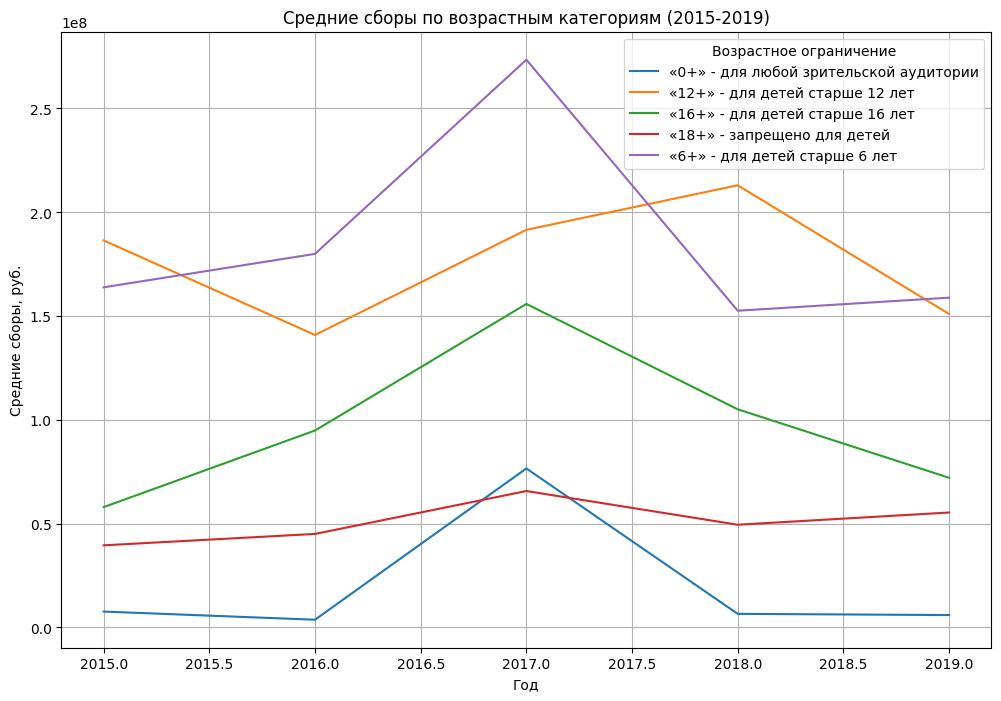

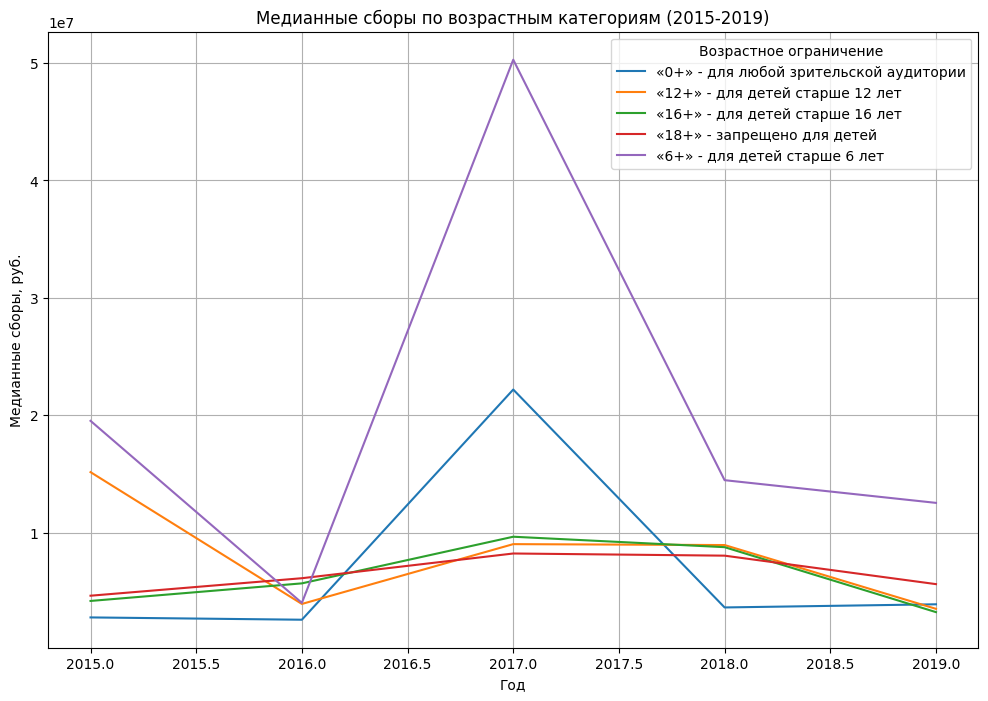

In [52]:
# Визуализация средних значений сборов для каждой возрастной категории по годам
fees_year_age['mean'].T.plot(figsize=(12, 8))  # Используем транспонирование (T), чтобы годы были по оси X
plt.title('Средние сборы по возрастным категориям (2015-2019)')
plt.xlabel('Год')
plt.ylabel('Средние сборы, руб.')
plt.legend(title='Возрастное ограничение')
plt.grid(True)
plt.show()

# Визуализация медианных значений сборов для каждой возрастной категории по годам
fees_year_age['median'].T.plot(figsize=(12, 8))
plt.title('Медианные сборы по возрастным категориям (2015-2019)')
plt.xlabel('Год')
plt.ylabel('Медианные сборы, руб.')
plt.legend(title='Возрастное ограничение')
plt.grid(True)
plt.show()

##### Вывод:


1. **Возрастная категория "6+"**:
   - **Средние сборы**: Фильмы с возрастным ограничением "6+" показали самые высокие средние сборы в 2017 году (273,43 млн рублей). Это свидетельствует о том, что семейная аудитория была наиболее активной в этот период, что могло быть связано с выходом успешных семейных фильмов. Однако в 2018 и 2019 годах средние сборы для этой категории снизились до 152,52 млн и 158,81 млн рублей соответственно.
   - **Медианные сборы**: В 2017 году фильмы с возрастным ограничением "6+" также продемонстрировали самые высокие медианные сборы среди всех категорий (50,27 млн рублей). Это указывает на высокую популярность семейных фильмов в этот год.

2. **Возрастная категория "12+"**:
   - **Средние сборы**: Фильмы с возрастным ограничением "12+" демонстрировали стабильные высокие средние сборы, особенно в 2018 году, когда они достигли 212,94 млн рублей. В 2017 году эта категория также показала хорошие результаты (191,50 млн рублей), но уступила категории "6+".
   - **Медианные сборы**: В 2017 году медианные сборы для категории "12+" составили 9,01 млн рублей, что значительно ниже, чем у категории "6+".

3. **Возрастная категория "16+"**:
   - **Средние сборы**: Фильмы с возрастным ограничением "16+" продемонстрировали высокие средние сборы в 2017 году (155,79 млн рублей), но не достигли уровня категории "6+". В последующие годы средние сборы для этой категории снизились.
   - **Медианные сборы**: Медианные сборы для категории "16+" в 2017 году составили 9,64 млн рублей, что меньше, чем у категории "6+", но выше, чем у "12+".

4. **Возрастная категория "18+"**:
   - **Средние сборы**: Фильмы с возрастным ограничением "18+" показали стабильные, но относительно низкие средние сборы по сравнению с другими категориями. В 2017 году их средние сборы составили 65,66 млн рублей.
   - **Медианные сборы**: Медианные сборы для категории "18+" в 2017 году составили 8,21 млн рублей, что также ниже, чем у "6+" и "16+".

5. **Возрастная категория "0+"**:
   - **Средние сборы**: Фильмы с возрастным ограничением "0+" показали значительный рост средних сборов в 2017 году (76,53 млн рублей), но в последующие годы они вновь снизились.
   - **Медианные сборы**: Медианные сборы для этой категории также достигли максимума в 2017 году (22,18 млн рублей), но оставались низкими по сравнению с другими категориями.

##### Итог:
- **Фильмы с возрастным ограничением "6+"** показали самые высокие средние и медианные сборы в 2017 году, что делает их лидерами по прибыльности в этот год.
- **Фильмы с возрастным ограничением "12+"** заняли второе место по средним сборам, особенно в 2018 году.
- **Фильмы с возрастным ограничением "16+"** также оставались значимыми, особенно в 2017 году, но их средние и медианные сборы уступали категории "6+".
- **Фильмы с возрастным ограничением "18+"** и "0+" показали стабильные, но более низкие сборы по сравнению с другими возрастными категориями.

##### Общий вывод:

Возрастное ограничение аудитории оказывает значительное влияние на сборы фильма в прокате в период с 2015 по 2019 год, и картина этих сборов меняется в зависимости от года.

1. **Фильмы с возрастным ограничением "6+"** показали самые высокие средние и медианные сборы в 2017 году. Этот факт указывает на то, что в 2017 году семейная аудитория была наиболее активной, что могло быть связано с выходом успешных семейных фильмов. Однако в 2018 и 2019 годах средние сборы для этой категории снизились, но остались значительными, что подтверждает популярность фильмов для семейного просмотра.

2. **Фильмы с возрастным ограничением "12+"** также продемонстрировали высокие сборы, особенно в 2018 году, когда средние сборы для этой категории достигли своего пика. Это свидетельствует о высоком интересе подростковой аудитории к фильмам в этот период. Несмотря на это, в 2017 году категория "6+" превзошла "12+" как по средним, так и по медианным сборам.

3. **Фильмы с возрастным ограничением "16+"** оставались значимыми, особенно в 2017 году, когда они показали высокие средние и медианные сборы. Тем не менее, они уступили лидерство категории "6+" и в последующие годы показали снижение сборов. Это может свидетельствовать о том, что подростковая и взрослая аудитория была активна в этот период, но интерес к фильмам для этой категории снизился после 2017 года.

4. **Фильмы с возрастным ограничением "18+"** и **"0+"** показали относительно стабильные, но более низкие средние и медианные сборы по сравнению с другими возрастными категориями. Это может быть связано с узкой целевой аудиторией для категории "18+" и менее агрессивными маркетинговыми кампаниями для категории "0+", ориентированной на младшую аудиторию.

##### Итог:
- **Фильмы с возрастным ограничением "6+"** лидировали в 2017 году по средним и медианным сборам, что подтверждает, что фильмы для семейной аудитории могут быть очень прибыльными.
- **Фильмы с возрастным ограничением "12+"** заняли второе место по прибыльности в 2017 году и лидировали в 2018 году, демонстрируя устойчивый интерес к подростковым фильмам.
- **Фильмы с возрастным ограничением "16+"** показали хорошие результаты в 2017 году, но уступили лидерство "6+" и "12+" в отдельных годах. Однако, по общим сборам за весь период с 2015 по 2019 годы, именно эта категория оказалась самой прибыльной, собрав в общей сложности 73,58 млрд рублей.
- **Фильмы с возрастным ограничением "18+"** и **"0+"** показали стабильные, но менее значительные результаты по сравнению с другими возрастными категориями, вероятно, из-за более узкой аудитории и меньшего акцента на маркетинг.

##### Общие сборы за период с 2015 по 2019 годы:

- **Фильмы с возрастным ограничением "16+"** собрали наибольшую сумму в прокате — 73,58 млрд рублей, что делает их самыми прибыльными среди всех возрастных категорий.
- **Фильмы с возрастным ограничением "12+"** заняли второе место по общим сборам, собрав 59,34 млрд рублей, что указывает на высокий интерес к фильмам, предназначенным для подростковой аудитории.
- **Фильмы с возрастным ограничением "6+"** заняли третье место с общими сборами в 55,22 млрд рублей, что свидетельствует о значительной популярности фильмов для семейного просмотра.
- **Фильмы с возрастным ограничением "18+"** собрали 40,45 млрд рублей, что делает их также достаточно прибыльными, несмотря на ограничения по возрасту.
- **Фильмы с возрастным ограничением "0+"** собрали наименьшую сумму — 703 млн рублей, что может быть связано с тем, что эти фильмы зачастую ориентированы на детей и имеют менее агрессивные маркетинговые кампании.

## Анализ фильмов, получивших государственную поддержку


In [53]:
# Фильтрация строк, где страна производства указана как "Россия"
data_good_rus_film = data_good.query('production_country == "россия"')

# Подсчет количества уникальных значений в столбце "financing_source" для отфильтрованных фильмов
data_good_rus_film['financing_source'].value_counts()

financing_source
министерство культуры               152
фонд кино                           128
министерство культуры, фонд кино     19
Name: count, dtype: int64

In [54]:
# Фильтрация строк, где источник финансирования является одним из следующих: "министерство культуры", "фонд кино", "министерство культуры, фонд кино"
rus_film_funded_state = data_good.query(
    'financing_source in ["министерство культуры", "фонд кино", "министерство культуры, фонд кино"]')

# Фильтрация строк, где источник финансирования НЕ является одним из следующих: "министерство культуры", "фонд кино", "министерство культуры, фонд кино"
rus_film_not_funded_state = data_good.query(
    'financing_source not in ["министерство культуры", "фонд кино", "министерство культуры, фонд кино"]')

В данном шаге я исследую фильмы, произведенные в России, чтобы выявить особенности и закономерности, связанные с государственной поддержкой кинопроизводства. Для этого я выполнил следующие действия:

1. **Фильтрация данных по стране производства**: Я выбрал только те фильмы, которые были произведены в России. Это позволяет сосредоточиться на анализе кинопроизводства внутри страны и исключить фильмы, созданные в других странах. Важно отметить, что финансовая поддержка распространяется только на фильмы, произведенные в современной России. Фильмы, созданные в СССР, не включены в этот анализ, так как на тот момент вся кинопроизводственная деятельность финансировалась государством, и не существовало отдельных фондов или программ поддержки.

2. **Анализ источников государственного финансирования**: Я подсчитал количество фильмов, получивших поддержку от различных государственных организаций, таких как Министерство культуры и Фонд кино. Это позволяет понять, какие источники финансирования наиболее распространены.

3. **Разделение фильмов на группы**: Я разделил фильмы на две группы: те, которые получили государственную поддержку, и те, для которых либо не известно, получили ли они поддержку, либо они ее не получили. Это позволит мне в дальнейшем провести сравнительный анализ между этими группами и выявить влияние государственной поддержки на успех фильмов.

##### Цели дальнейшего анализа:

Теперь, когда данные были подготовлены, я планирую выполнить следующие шаги:

1. **Оценка объема государственной поддержки**: Определить, сколько средств выделяется на поддержку фильмов, проанализировав столбец `sum_support`.

2. **Анализ окупаемости фильмов**: Сравнить суммы сборов с суммами поддержки, чтобы понять, насколько хорошо окупаются фильмы, получившие государственную поддержку.

3. **Анализ рейтингов**: Исследовать рейтинги фильмов с государственной поддержкой и без нее, чтобы определить, влияет ли государственная поддержка на качество и восприятие фильмов зрителями.

4. **Поиск закономерностей**: Выявить интересные тренды и закономерности в данных, связанные с государственной поддержкой, например, распределение по годам, жанрам и источникам финансирования.

### Анализ объема государственной поддержки:

In [55]:
# Вычисление доли фильмов с государственным финансированием среди всех фильмов, произведенных в России
len(rus_film_funded_state) / len(data_good_rus_film)

0.17726505346088914

In [56]:
# Группировка данных по источнику финансирования и вычисление среднего и медианного размера государственной поддержки
support_stats = rus_film_funded_state.groupby('financing_source')['sum_support'].agg(['mean', 'median'])
support_stats

,mean,median
financing_source,,
министерство культуры,"29,635,957.1","28,000,000.0"
"министерство культуры, фонд кино","55,353,874.0","49,000,000.0"
фонд кино,"97,829,209.9","60,000,000.0"


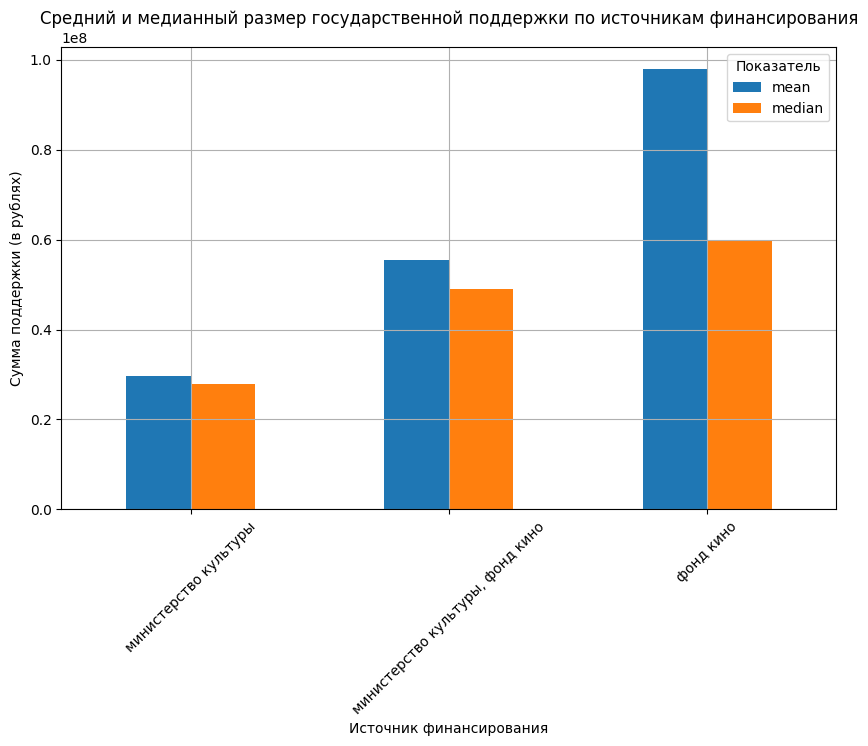

In [57]:
#Визуализация
support_stats.plot(kind='bar', figsize=(10, 6))

# Настройка графика
plt.title('Средний и медианный размер государственной поддержки по источникам финансирования')
plt.ylabel('Сумма поддержки (в рублях)')
plt.xlabel('Источник финансирования')
plt.xticks(rotation=45)
plt.legend(title='Показатель')
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе представленных данных можно сделать следующие выводы о среднем и медианном размере государственной поддержки, выделяемой различными источниками финансирования:

1. **Фонд кино** выделяет наиболее значительные суммы на поддержку фильмов:
   - **Средний размер поддержки** составляет около 97,83 млн рублей, что является самым высоким значением среди всех источников финансирования.
   - **Медианный размер поддержки** также наибольший и составляет 60 млн рублей.

2. **Комбинация Министерства культуры и Фонда кино** занимает второе место по размеру выделяемых средств:
   - **Средний размер поддержки** составляет около 55,35 млн рублей.
   - **Медианный размер поддержки** составляет 49 млн рублей.

3. **Министерство культуры** выделяет наименьшие суммы на поддержку фильмов:
   - **Средний размер поддержки** составляет около 29,64 млн рублей.
   - **Медианный размер поддержки** составляет 28 млн рублей.

##### Итог:
Наибольшие суммы поддержки выделяются Фондом кино, что может свидетельствовать о большем масштабе проектов, финансируемых этой организацией. Министерство культуры, напротив, предоставляет меньшие по размеру гранты, но все же существенно поддерживает кинопроизводство в России.


In [58]:
# Определение минимальных и максимальных значений суммы государственной поддержки для каждого источника финансирования
support_spread = rus_film_funded_state.groupby('financing_source')['sum_support'].agg(['min', 'max'])

# Вывод результата
support_spread

,min,max
financing_source,,
министерство культуры,"3,000,000.0","70,000,000.0"
"министерство культуры, фонд кино","25,200,000.0","150,000,000.0"
фонд кино,"15,000,000.0","500,000,000.0"


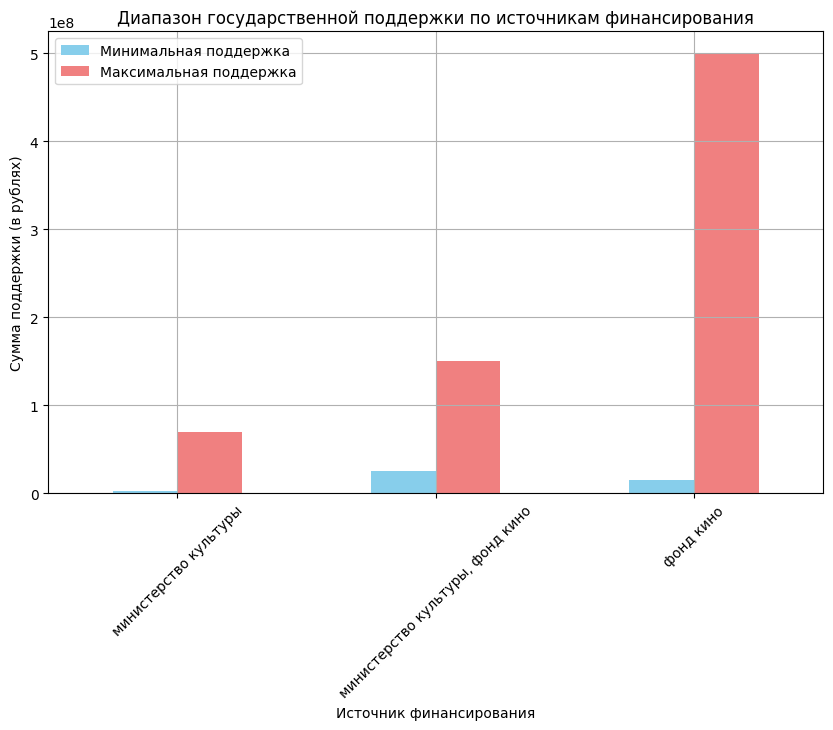

In [59]:
# Визуализация минимальных и максимальных значений суммы поддержки
support_spread.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Настройка графика
plt.title('Диапазон государственной поддержки по источникам финансирования')
plt.ylabel('Сумма поддержки (в рублях)')
plt.xlabel('Источник финансирования')
plt.xticks(rotation=45)
plt.legend(['Минимальная поддержка', 'Максимальная поддержка'])
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе представленных данных можно сделать следующие выводы о диапазоне государственной поддержки, выделяемой различными источниками финансирования:

1. **Фонд кино** предоставляет наибольший диапазон государственной поддержки:
   - **Минимальная поддержка** составляет 15 млн рублей.
   - **Максимальная поддержка** достигает 500 млн рублей, что указывает на возможность выделения значительных сумм для отдельных проектов.

2. **Комбинация Министерства культуры и Фонда кино** также охватывает широкий диапазон:
   - **Минимальная поддержка** составляет 25,2 млн рублей.
   - **Максимальная поддержка** достигает 150 млн рублей, что свидетельствует о высоком уровне финансирования при совместной поддержке этих двух организаций.

3. **Министерство культуры** имеет самый узкий диапазон выделяемых средств:
   - **Минимальная поддержка** составляет 3 млн рублей.
   - **Максимальная поддержка** достигает 70 млн рублей, что меньше по сравнению с другими источниками.

##### Итог:
Фонд кино выделяет значительно более крупные суммы на поддержку отдельных проектов, чем Министерство культуры, что может свидетельствовать о приоритетах в распределении средств. Совместное финансирование Министерства культуры и Фонда кино позволяет обеспечить высокий уровень поддержки, но все же уступает максимальным значениям, выделяемым непосредственно Фондом кино.


In [60]:
# Создание сводной таблицы, которая рассчитывает средние и медианные значения суммы государственной поддержки 
age_support = rus_film_funded_state.pivot_table(
    index='age_restriction',  # Возрастные ограничения используются как строки (индекс) в таблице
    columns='financing_source',  # Источники финансирования используются как столбцы
    values='sum_support',  # Суммы государственной поддержки, которые будут агрегироваться
    aggfunc=['mean', 'median']  # Рассчитываются средние и медианные значения суммы поддержки
)

# Вывод сводной таблицы
age_support

mean  \
financing_source                       министерство культуры   
age_restriction                                                
«0+» - для любой зрительской аудитории          21,704,000.0   
«12+» - для детей старше 12 лет                 30,337,441.9   
«16+» - для детей старше 16 лет                 27,966,633.8   
«18+» - запрещено для детей                     30,285,714.3   
«6+» - для детей старше 6 лет                   34,608,695.7   

                                                                         \
financing_source                       министерство культуры, фонд кино   
age_restriction                                                           
«0+» - для любой зрительской аудитории                              NaN   
«12+» - для детей старше 12 лет                            53,563,135.4   
«16+» - для детей старше 16 лет                            60,192,186.5   
«18+» - запрещено для детей                                62,448,960.3   
«6+» - для детей старше 6 лет                              39,150,000.0   

                                                                    median  \
financing_source                           фонд кино министерство культуры   
age_restriction                                                              
«0+» - для любой зрительской аудитории  55,000,000.0          25,000,000.0   
«12+» - для детей старше 12 лет        112,465,056.2          30,000,000.0   
«16+» - для детей старше 16 лет         70,591,931.7          26,500,000.0   
«18+» - запрещено для детей             43,333,333.3          27,000,000.0   
«6+» - для детей старше 6 лет          117,738,367.1          35,000,000.0   

                                                                         \
financing_source                       министерство культуры, фонд кино   
age_restriction                                                           
«0+» - для любой зрительской аудитории                              NaN   
«12+» - для детей старше 12 лет                            48,251,149.5   
«16+» - для детей старше 16 лет                            47,000,000.0   
«18+» - запрещено для детей                                60,000,000.0   
«6+» - для детей старше 6 лет                              39,150,000.0   

                                                     
financing_source                          фонд кино  
age_restriction                                      
«0+» - для любой зрительской аудитории 70,000,000.0  
«12+» - для детей старше 12 лет        77,250,000.0  
«16+» - для детей старше 16 лет        40,000,000.0  
«18+» - запрещено для детей            50,000,000.0  
«6+» - для детей старше 6 лет          87,500,000.0

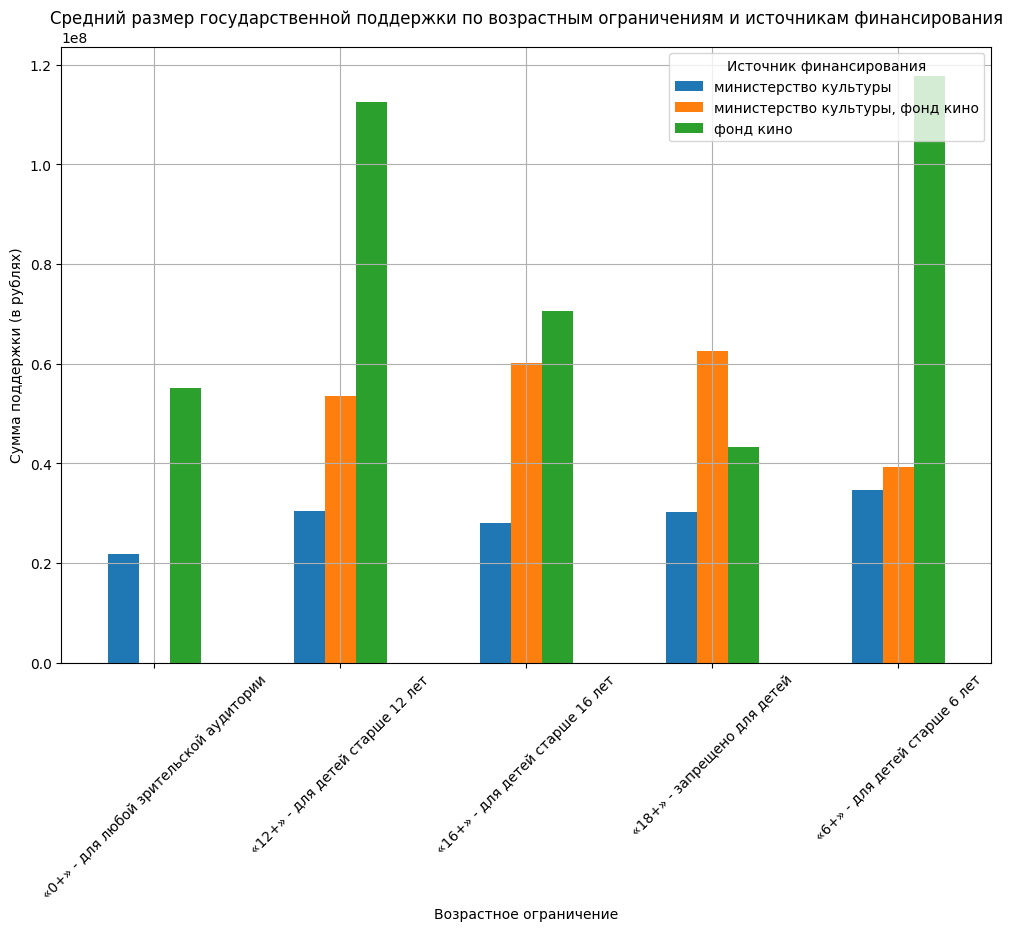

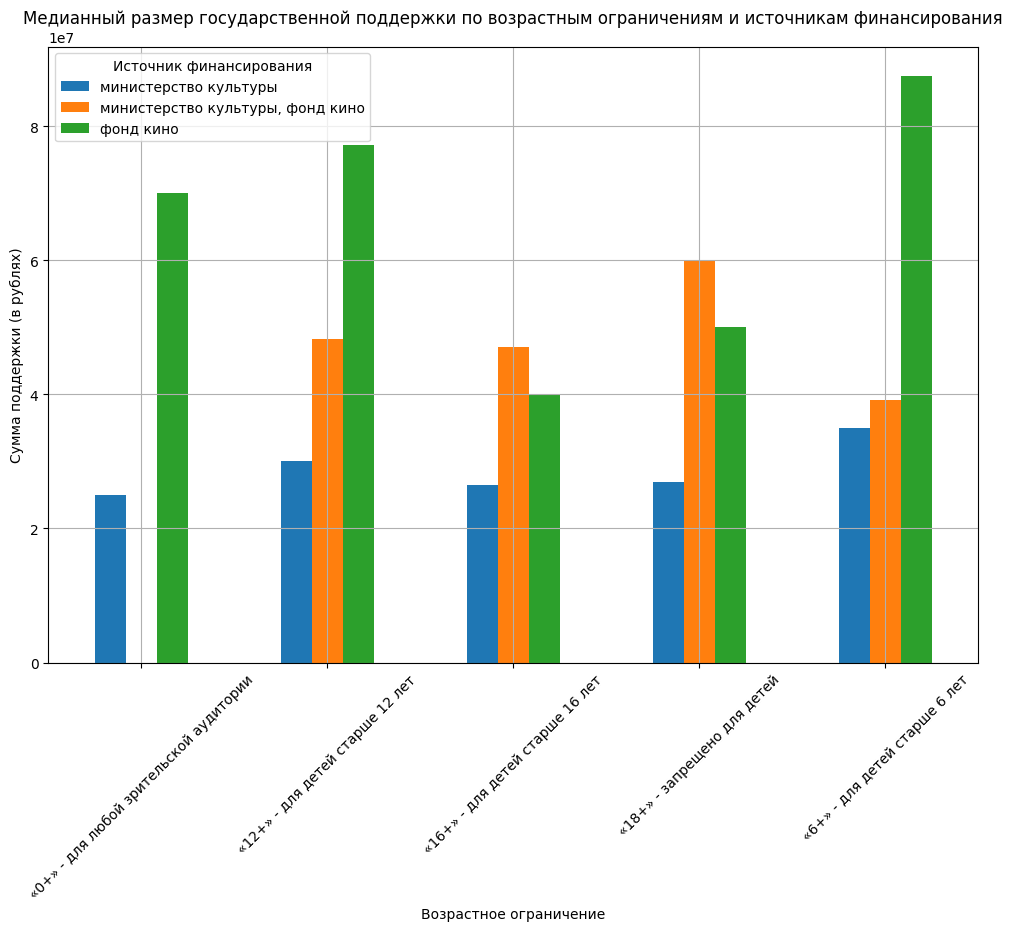

In [61]:
# Визуализация средних значений суммы поддержки
age_support_mean = age_support['mean']
age_support_mean.plot(kind='bar', figsize=(12, 8))

# Настройка графика
plt.title('Средний размер государственной поддержки по возрастным ограничениям и источникам финансирования')
plt.ylabel('Сумма поддержки (в рублях)')
plt.xlabel('Возрастное ограничение')
plt.xticks(rotation=45)
plt.legend(title='Источник финансирования')
plt.grid(True)

# Показ графика
plt.show()

# Визуализация медианных значений суммы поддержки
age_support_median = age_support['median']
age_support_median.plot(kind='bar', figsize=(12, 8))

# Настройка графика
plt.title('Медианный размер государственной поддержки по возрастным ограничениям и источникам финансирования')
plt.ylabel('Сумма поддержки (в рублях)')
plt.xlabel('Возрастное ограничение')
plt.xticks(rotation=45)
plt.legend(title='Источник финансирования')
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе данных о средних и медианных значениях суммы государственной поддержки, распределенной по возрастным ограничениям и источникам финансирования, можно сделать следующие выводы:

1. **Министерство культуры**:
   - **Средние значения**: Поддержка фильмов колеблется от 21,70 млн рублей для категории "0+" до 34,61 млн рублей для категории "6+".
   - **Медианные значения**: Медианные суммы находятся в диапазоне от 25 млн до 35 млн рублей, что указывает на относительно равномерное распределение средств среди всех возрастных категорий.

2. **Комбинация Министерства культуры и Фонда кино**:
   - **Средние значения**: Наибольшие средние суммы поддержки получают фильмы категории "18+" (62,45 млн рублей) и "16+" (60,19 млн рублей). Это говорит о том, что более зрелые фильмы получают больше средств при совместной поддержке.
   - **Медианные значения**: Медианные суммы варьируются от 39,15 млн рублей для категории "6+" до 60 млн рублей для категории "18+", что подтверждает значительный вклад в более зрелые фильмы.

3. **Фонд кино**:
   - **Средние значения**: Самые высокие средние суммы поддержки получают фильмы категории "12+" (112,47 млн рублей) и "6+" (117,74 млн рублей). Это говорит о том, что семейные и подростковые фильмы получают наибольшую поддержку.
   - **Медианные значения**: Медианные суммы подтверждают это наблюдение, составляя до 87,5 млн рублей для категории "6+".

##### Итог:
- **Фонд кино** выделяет наибольшие суммы на поддержку фильмов, особенно для семейной и подростковой аудитории ("6+" и "12+").
- **Министерство культуры** и его совместная поддержка с Фондом кино распределяют средства более равномерно между разными возрастными категориями, с несколько большим акцентом на более зрелые фильмы ("16+" и "18+").
- В общем, наибольшую финансовую поддержку получают фильмы категории "6+" и "12+", что может свидетельствовать о приоритете поддержки семейного и подросткового кино.


##### Общий вывод по анализу объема государственной поддержки:

На основе проведенного анализа можно сделать следующие ключевые выводы о распределении и влиянии государственной поддержки на кинопроизводство в России:

1. **Фонд кино** является основным источником финансирования, выделяя самые значительные суммы на поддержку кинопроектов. Этот фонд демонстрирует как наибольший средний размер поддержки (около 97,83 млн рублей), так и самый широкий диапазон выделяемых средств, что достигает 500 млн рублей. Основное внимание Фонд кино уделяет семейным и подростковым фильмам, что может свидетельствовать о стратегической ориентации на массовую аудиторию.

2. **Министерство культуры**, несмотря на выделение меньших сумм по сравнению с Фондом кино, остается важным источником поддержки кинопроизводства. Средний размер поддержки от Министерства культуры составляет около 29,64 млн рублей, а максимальная сумма — 70 млн рублей. Средства распределяются достаточно равномерно среди всех возрастных категорий, что указывает на сбалансированный подход в поддержке различных типов фильмов.

3. **Совместная поддержка Министерства культуры и Фонда кино** позволяет выделять значительные суммы на проекты, особенно те, которые рассчитаны на более зрелую аудиторию ("16+" и "18+"). Это свидетельствует о том, что более сложные и потенциально менее коммерчески успешные проекты также получают существенную финансовую поддержку.

4. **Возрастная категория "6+" и "12+"** получает наибольшую финансовую поддержку, особенно со стороны Фонда кино. Это подчеркивает приоритет в поддержке фильмов для массового зрителя, ориентированных на семейную и подростковую аудиторию.

##### Итог:
Общий анализ показывает, что государственная поддержка российского кинопроизводства распределяется с учетом как коммерческого потенциала, так и культурной значимости фильмов. Фонд кино ориентирован на поддержку проектов с массовой привлекательностью, в то время как Министерство культуры и его совместная поддержка с Фондом кино обеспечивают финансирование широкого спектра кинопроектов, включая фильмы для более зрелой аудитории. В целом, структура государственной поддержки способствует развитию как коммерчески успешных, так и культурно значимых фильмов.


### Анализ окупаемости фильмов с государственной поддержкой:

In [62]:
# Определение функции для расчета окупаемости фильма
def payback_support(box, bud):
    payback = box - bud  # Вычисляем разницу между сборами (box_office) и бюджетом (sum_support)
    if payback < 0:
        return 'не окупился'  # Если разница отрицательная, фильм не окупился
    elif payback > 0:
        return 'окупился'  # Если разница положительная, фильм окупился
    else:
        return 'вышел в 0'  # Если разница равна нулю, фильм вышел "в ноль"
    
# Применение функции к каждому фильму для определения его окупаемости
rus_film_funded_state['payback_film_support'] = rus_film_funded_state.apply(
    lambda row: payback_support(row['box_office'], row['sum_support']), axis=1
)

In [63]:
# Подсчет количества фильмов, которые окупились, не окупились или вышли в ноль
rus_film_funded_state['payback_film_support'].value_counts()

payback_film_support
не окупился    196
окупился       105
вышел в 0       14
Name: count, dtype: int64

##### Вывод:

На основе подсчета количества фильмов, получивших государственную поддержку, можно сделать следующие выводы:

1. **Не окупились**: Большинство фильмов, 196 из 315, не смогли окупить вложенные средства. Это свидетельствует о высоком уровне риска в кинопроектах, получающих государственное финансирование.

2. **Окупились**: 105 фильмов окупились, что составляет примерно треть от общего количества фильмов. Это указывает на то, что государственная поддержка может приводить к успешным результатам, но такие случаи не являются доминирующими.

3. **Вышли в ноль**: Лишь 14 фильмов вышли "в ноль", то есть их сборы ровно покрыли сумму поддержки. Этот результат показывает, что для большинства проектов государственная поддержка либо не приносит прибыли, либо ведет к убыткам.

##### Итог:
- Более половины фильмов, получивших государственную поддержку, оказались убыточными, что указывает на необходимость пересмотра критериев отбора проектов или стратегий финансирования.
- Около трети фильмов смогли окупить вложенные средства, что демонстрирует потенциал государственной поддержки в создании успешных кинопроектов, но также показывает, что значительная часть инвестиций не приносит желаемого результата.
- Очень небольшое количество фильмов выходит в ноль, что подтверждает, что такие проекты, как правило, либо убыточны, либо приносят прибыль.


In [64]:
# Группировка данных по источнику финансирования и результату окупаемости, затем подсчет количества фильмов в каждой группе
payback_film_rus_support = rus_film_funded_state.groupby(['financing_source', 'payback_film_support']).size()

# Вывод результата
payback_film_rus_support

financing_source                  payback_film_support
министерство культуры             вышел в 0                12
                                  не окупился             124
                                  окупился                 27
министерство культуры, фонд кино  не окупился              20
                                  окупился                  1
фонд кино                         вышел в 0                 2
                                  не окупился              52
                                  окупился                 77
dtype: int64

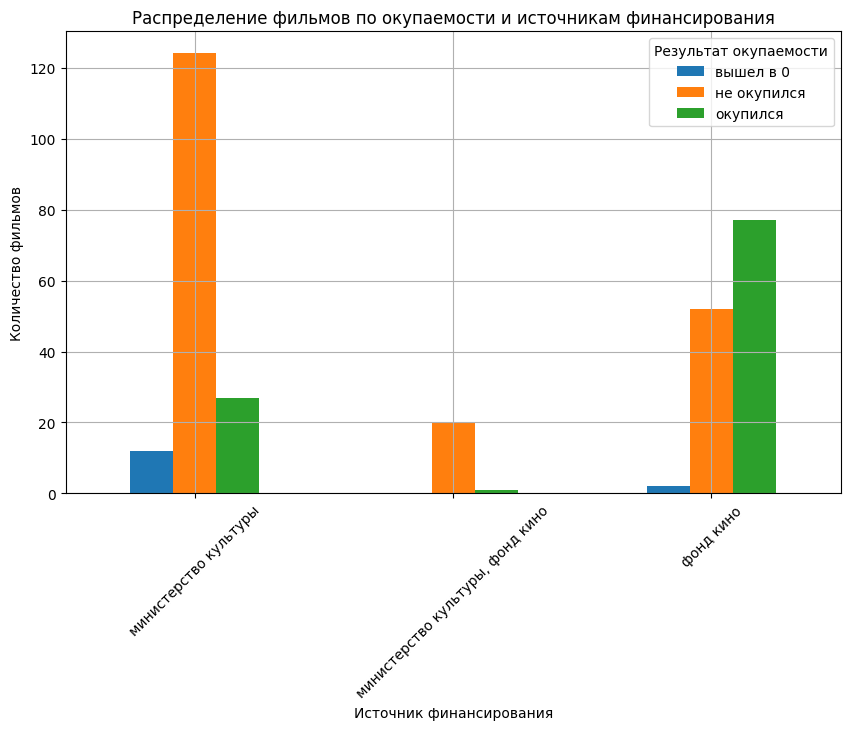

In [65]:
# Преобразование данных с помощью unstack() для удобства визуализации
payback_film_rus_support_unstacked = payback_film_rus_support.unstack()

# Построение столбчатой диаграммы
payback_film_rus_support_unstacked.plot(kind='bar', figsize=(10, 6))

# Настройка графика
plt.title('Распределение фильмов по окупаемости и источникам финансирования')
plt.xlabel('Источник финансирования')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.legend(title='Результат окупаемости')
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе представленных данных о результатах окупаемости фильмов, получивших государственную поддержку, можно сделать следующие выводы:

1. **Министерство культуры**:
   - Большинство фильмов, финансируемых Министерством культуры, не окупились: 124 фильма не смогли вернуть вложенные средства.
   - 27 фильмов окупились, что указывает на некоторые успешные проекты, несмотря на общий тренд.
   - 12 фильмов вышли "в ноль", то есть их сборы ровно покрыли сумму поддержки.

2. **Совместное финансирование Министерства культуры и Фонда кино**:
   - Здесь также доминирует негативный результат: 20 фильмов не окупились.
   - Лишь 1 фильм смог окупить вложенные средства, что свидетельствует о высоких рисках для таких проектов.
   - Нет фильмов, которые вышли бы "в ноль".

3. **Фонд кино**:
   - Фонд кино показывает лучший результат по окупаемости: 77 фильмов окупились, что значительно больше, чем в других группах.
   - Однако 52 фильма, несмотря на поддержку, не окупились.
   - Лишь 2 фильма вышли "в ноль".

##### Итог:
- **Министерство культуры** в основном поддерживает проекты с высоким риском, так как большинство фильмов не окупаются.
- **Совместное финансирование Министерства культуры и Фонда кино** также связано с высоким риском, так как большинство проектов не окупаются.
- **Фонд кино** показывает лучшие результаты: большее количество фильмов окупились, что свидетельствует о более тщательном отборе проектов или о более эффективном использовании средств.

##### Общий вывод по анализу окупаемости фильмов с государственной поддержкой:

На основе проведенного анализа можно сделать следующие ключевые выводы:

1. **Общая окупаемость фильмов**:
   - Большинство фильмов, получивших государственную поддержку, не окупились (196 из 315). Это подчеркивает высокий уровень риска при реализации кинопроектов, финансируемых государством. Около трети фильмов (105) смогли окупить вложенные средства, что указывает на наличие успешных проектов, хотя они не являются преобладающими. Лишь незначительное число фильмов (14) вышли "в ноль", что говорит о том, что такие проекты обычно либо приносят прибыль, либо оказываются убыточными.

2. **Эффективность поддержки различных источников**:
   - **Министерство культуры**: Большинство фильмов, поддержанных Министерством культуры, оказались убыточными (124 фильма). Лишь 27 фильмов смогли окупить затраты, и 12 фильмов вышли в ноль. Это свидетельствует о высоком уровне риска при поддержке проектов, финансируемых только Министерством культуры.
   - **Совместное финансирование Министерства культуры и Фонда кино**: Здесь также доминируют негативные результаты — из 21 проекта только один окупился, а остальные не смогли вернуть вложенные средства. Нет фильмов, которые вышли бы в ноль, что указывает на значительные риски для таких проектов.
   - **Фонд кино**: Фонд кино демонстрирует лучшие результаты среди источников финансирования. Из 131 поддержанного фильма, 77 смогли окупиться, что составляет значительную часть от общего числа. Тем не менее, 52 фильма остались убыточными, и только 2 фильма вышли в ноль.

##### Итог:
- **Министерство культуры** и **совместное финансирование с Фондом кино** в основном поддерживают проекты с высоким риском, так как большинство фильмов не окупаются. Эти данные указывают на необходимость пересмотра критериев отбора проектов или стратегий финансирования.
- **Фонд кино** демонстрирует лучшие результаты по окупаемости, что свидетельствует о более тщательном отборе проектов или о более эффективном использовании средств. Это также может означать, что Фонд кино ориентирован на проекты с более высоким коммерческим потенциалом.

В целом, анализ показывает, что государственная поддержка имеет существенный риск, и лишь определенная часть фильмов становится коммерчески успешной. Это подчеркивает важность стратегического подхода в распределении государственной поддержки для максимизации шансов на успех.


### Анализ рейтинга фильмов с государственной поддержкой:

In [66]:
# Группировка данных по источнику финансирования и вычисление среднего и медианного значения рейтингов фильмов для каждой группы
rating_support = rus_film_funded_state.groupby('financing_source')['ratings'].agg(['mean', 'median'])

# Вывод результата
rating_support

,mean,median
financing_source,,
министерство культуры,6.2,6.2
"министерство культуры, фонд кино",6.4,6.6
фонд кино,5.8,6.0


In [67]:
# Вычисление среднего и медианного значений рейтингов для фильмов без государственной поддержки
rating_not_support = rus_film_not_funded_state['ratings'].agg(['mean', 'median'])

# Вывод результатов
rating_not_support

mean     6.5
median   6.6
Name: ratings, dtype: float64

##### Вывод:

На основе проведенного анализа рейтингов фильмов с государственной поддержкой и без нее можно сделать следующие выводы:

1. **Фильмы с государственной поддержкой**:
   - **Министерство культуры**: Средний рейтинг фильмов, получивших финансирование от Министерства культуры, составляет 6.17, а медианный рейтинг — 6.20. Это указывает на то, что фильмы, поддерживаемые Министерством культуры, получают умеренно положительные оценки зрителей.
   - **Совместное финансирование Министерства культуры и Фонда кино**: Средний рейтинг фильмов, поддерживаемых совместно Министерством культуры и Фондом кино, составляет 6.43, а медианный рейтинг — 6.55. Эти фильмы показывают несколько более высокие рейтинги по сравнению с другими категориями государственной поддержки.
   - **Фонд кино**: Фильмы, финансируемые Фондом кино, имеют средний рейтинг 5.82 и медианный рейтинг 6.00, что является самым низким значением среди всех категорий государственной поддержки.

2. **Фильмы без государственной поддержки**:
   - Средний рейтинг фильмов, не получивших государственную поддержку, составляет 6.48, а медианный рейтинг — 6.60. Это указывает на то, что фильмы, не получившие поддержку, в целом имеют несколько более высокие оценки зрителей по сравнению с фильмами, поддержанными государством.

##### Итог:
- Фильмы, получившие государственную поддержку, в среднем имеют несколько более низкие рейтинги по сравнению с фильмами, не получившими такую поддержку. Особенно это заметно в случае фильмов, финансируемых Фондом кино, которые имеют самые низкие средние рейтинги среди всех рассмотренных категорий.
- Совместное финансирование Министерства культуры и Фонда кино демонстрирует наилучшие результаты среди фильмов с государственной поддержкой, но все же уступает рейтингам фильмов, которые не получили поддержку.
- Эти данные могут указывать на то, что государственная поддержка не всегда связана с высоким качеством или популярностью фильмов среди зрителей.


In [68]:
# Вычисление корреляции между суммой государственной поддержки и рейтингом фильмов
correlation_rating_support = rus_film_funded_state['sum_support'].corr(rus_film_funded_state['ratings'])

# Вывод результата корреляции
correlation_rating_support

0.10819885285532144

##### Вывод:

Корреляция между суммой государственной поддержки и рейтингом фильмов, получивших эту поддержку, составляет примерно 0.108. Это означает, что существует очень слабая положительная корреляция между этими двумя переменными.

##### Итог:
- **Слабая корреляция**: Значение корреляции близко к нулю, что говорит о том, что сумма государственной поддержки практически не связана с рейтингом фильмов. Это может означать, что размер полученной поддержки не оказывает значительного влияния на восприятие фильма зрителями.
- **Отсутствие сильной зависимости**: Фактически, фильмы, получившие большую или меньшую сумму поддержки, могут иметь как высокие, так и низкие рейтинги, что подтверждается низким значением корреляции.

Таким образом, размер государственной поддержки не является основным фактором, определяющим рейтинг фильмов среди зрителей.


### Поиск закономерностей с государственной поддержкой:

In [69]:
# Группировка данных по годам проката (rental_year) и вычисление среднего и медианного значений суммы государственной поддержки (sum_support) для каждого года
year_support = rus_film_funded_state.groupby('rental_year')['sum_support'].agg(['mean', 'median'])

# Вывод результатов
year_support

,mean,median
rental_year,,
2013,"67,173,972.5","67,173,972.5"
2014,"36,600,153.3","28,000,000.0"
2015,"40,340,518.2","30,000,000.0"
2016,"68,571,646.2","35,000,000.0"
2017,"79,460,811.8","40,000,000.0"
2018,"59,576,923.1","37,500,000.0"
2019,"68,463,768.1","40,000,000.0"


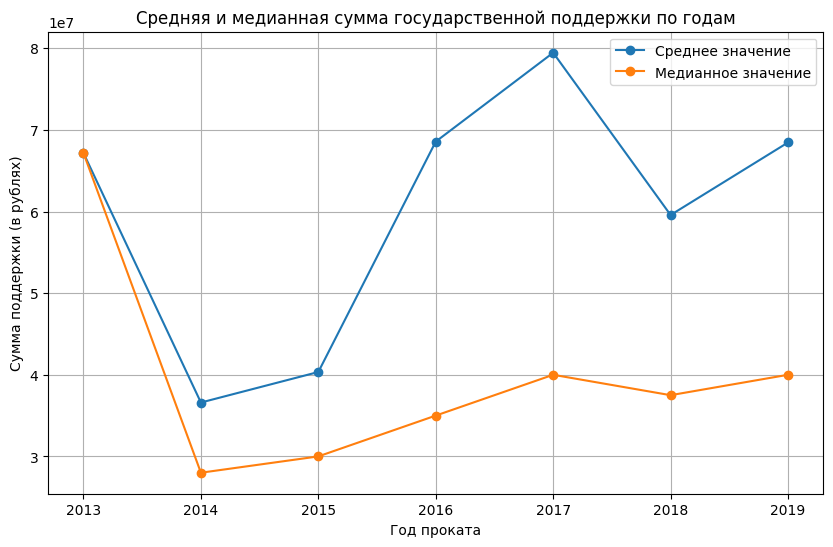

In [70]:
# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(year_support.index, year_support['mean'], marker='o', label='Среднее значение')
plt.plot(year_support.index, year_support['median'], marker='o', label='Медианное значение')

# Настройки графика
plt.title('Средняя и медианная сумма государственной поддержки по годам')
plt.xlabel('Год проката')
plt.ylabel('Сумма поддержки (в рублях)')
plt.legend()
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе данных о средней и медианной суммах государственной поддержки по годам можно сделать следующие выводы:

1. **Тенденции в среднем значении поддержки**:
   - В 2017 году наблюдается самый высокий средний уровень государственной поддержки — около 79.46 млн рублей.
   - В 2013 году средний уровень поддержки был также высоким и составил около 67.17 млн рублей.
   - В 2014 году средняя сумма поддержки снизилась до 36.60 млн рублей, после чего наблюдается рост, достигающий пика в 2017 году. В 2018 году средний показатель снизился до 59.58 млн рублей, а в 2019 году вырос до 68.46 млн рублей.
   - Эти колебания могут свидетельствовать о том, что государственная поддержка варьировалась в зависимости от экономических условий или приоритетов в поддержке киноиндустрии.

2. **Тенденции в медианном значении поддержки**:
   - Медианные значения демонстрируют более стабильную динамику: от 28 млн рублей в 2014 году до 40 млн рублей в 2017 и 2019 годах.
   - Это указывает на то, что основная часть фильмов получает относительно стабильные суммы поддержки, несмотря на колебания среднего значения, которое может быть искажено за счет отдельных проектов с высокими бюджетами.

3. **Сравнение среднего и медианного значений**:
   - В некоторых годах, таких как 2013 и 2016, среднее значение превышает медианное, что может свидетельствовать о наличии нескольких проектов с очень высокими суммами поддержки.
   - В другие годы, такие как 2014, 2017, 2018 и 2019, разница между средним и медианным значением менее заметна, что может указывать на более равномерное распределение средств между проектами.

##### Итог:
Средняя и медианная суммы государственной поддержки по годам показывают, что финансирование киноиндустрии не было равномерным в период с 2013 по 2019 годы. Хотя медианные значения демонстрируют относительную стабильность, колебания средних значений могут указывать на то, что в отдельные годы выделялись значительные средства на определенные проекты.


In [71]:
# Группировка данных по жанрам и вычисление среднего и медианного значений суммы государственной поддержки
genres_support = rus_film_funded_state.groupby('genres')['sum_support'].agg(['mean', 'median'])

# Сортировка данных по медианному значению суммы поддержки в порядке убывания
genres_support = genres_support.sort_values(by='median', ascending=False).head(5)

# Вывод топ-5 жанров с наибольшей медианной суммой государственной поддержки
genres_support

,mean,median
genres,,
"фантастика,боевик","500,000,000.0","500,000,000.0"
"история,биография,драма","500,000,000.0","500,000,000.0"
"драма,триллер,приключения","442,104,482.0","442,104,482.0"
"история,боевик,фэнтези","350,000,000.0","350,000,000.0"
"детектив,триллер,криминал","300,000,000.0","300,000,000.0"


In [72]:
# Группировка данных по жанрам и результату окупаемости, затем подсчет количества фильмов в каждой группе
genres_payback_support = rus_film_funded_state.groupby(['main_genres', 'payback_film_support']).size()

# Преобразование Series в DataFrame для сортировки
genres_payback_support = genres_payback_support.reset_index(name='count')

# Сортировка данных по количеству фильмов в порядке убывания и выбор топ-10
genres_payback_support = genres_payback_support.sort_values(by='count', ascending=False).head(10)

# Вывод результата
genres_payback_support

,main_genres,payback_film_support,count
11,драма,не окупился,68
16,комедия,не окупился,37
17,комедия,окупился,30
12,драма,окупился,18
24,мультфильм,окупился,16
34,триллер,не окупился,13
21,мелодрама,не окупился,13
23,мультфильм,не окупился,9
41,фэнтези,не окупился,8
10,драма,вышел в 0,6


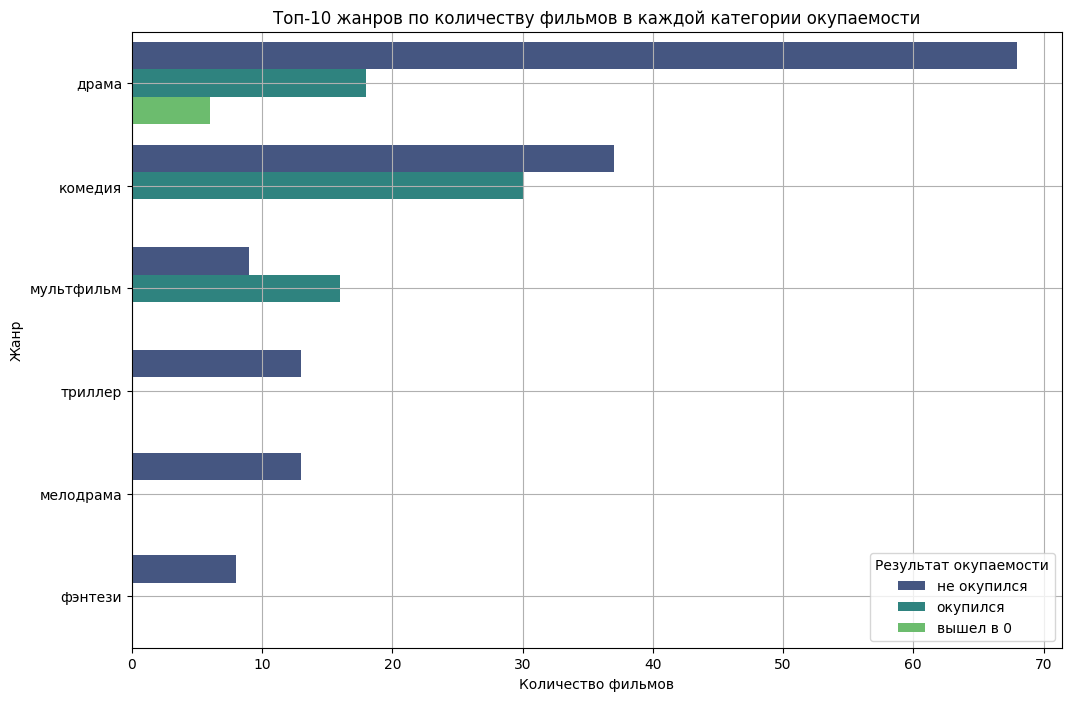

In [73]:
# Создание столбчатой диаграммы
plt.figure(figsize=(12, 8))
sns.barplot(
    x='count', 
    y='main_genres', 
    hue='payback_film_support', 
    data=genres_payback_support, 
    palette='viridis'
)

# Настройки графика
plt.title('Топ-10 жанров по количеству фильмов в каждой категории окупаемости')
plt.xlabel('Количество фильмов')
plt.ylabel('Жанр')
plt.legend(title='Результат окупаемости')
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе анализа данных по жанрам и результатам окупаемости фильмов, можно сделать следующие выводы:

1. **Жанры с наибольшим числом фильмов, которые не окупились**:
   - **Драма**: Наиболее подверженный риску жанр, где 68 фильмов не смогли окупить вложенные средства.
   - **Комедия**: На втором месте по числу не окупившихся фильмов, с 37 фильмами.
   - **Триллер** и **Мелодрама**: Эти жанры также часто не окупаются, с 13 фильмами в каждом жанре.

2. **Жанры с наибольшим числом окупившихся фильмов**:
   - **Комедия**: Лидирует по числу окупившихся фильмов среди всех жанров — 30 фильмов.
   - **Драма**: Также имеет значительное количество окупившихся фильмов — 18.
   - **Мультфильм**: Жанр с 16 окупившимися фильмами, что делает его успешным с точки зрения окупаемости.

3. **Жанры с наименьшим числом фильмов, которые не окупились**:
   - **Мультфильм** и **Фэнтези**: По 9 и 8 фильмов соответственно не окупились, что является относительно небольшим числом по сравнению с другими жанрами.

4. **Фильмы, которые вышли в ноль**:
   - **Драма**: Шесть фильмов в жанре драма вышли "в ноль", то есть их сборы ровно покрыли сумму поддержки.

##### Итог:
Драма и комедия — это жанры, которые одновременно имеют как наибольшее количество не окупившихся фильмов, так и значительное число успешных проектов. Мультфильмы, несмотря на меньшую общую численность, показывают хорошие результаты в окупаемости. Жанры с меньшим количеством фильмов, такие как триллер и мелодрама, также демонстрируют значительный риск не окупиться.


##### Общий вывод по поиску закономерностей с государственной поддержкой:

На основе проведенного анализа можно сделать следующие выводы, отвечающие на поставленные задачи:

1. **Распределение по годам**:
   - Государственная поддержка кинопроектов в период с 2013 по 2019 годы не была равномерной. Наиболее продуктивными с точки зрения выделения средств были 2013 и 2017 годы. В 2017 году был зафиксирован самый высокий средний уровень государственной поддержки — около 79.46 млн рублей.
   - Несмотря на рост в 2017 году, в последующие годы наблюдается некоторая нестабильность: в 2018 году средняя сумма поддержки снизилась до 59.58 млн рублей, а в 2019 году снова увеличилась до 68.46 млн рублей. Эти колебания могут быть связаны с экономическими условиями и изменениями приоритетов в поддержке киноиндустрии.

2. **Жанровой анализ**:
   - **Драма** и **Комедия** — жанры, которые получили наибольшее количество государственной поддержки, но при этом они также оказались наиболее рискованными с точки зрения окупаемости. Драма особенно выделяется как жанр, где наибольшее количество фильмов не смогло окупить вложенные средства.
   - **Мультфильмы** показали хорошие результаты в окупаемости. Несмотря на меньшее количество проектов, они оказались достаточно успешными, с высоким процентом окупившихся фильмов.
   - **Триллеры** и **Мелодрамы** продемонстрировали высокий уровень риска, с наибольшей долей фильмов, которые не окупились.

3. **Заключение**:
   - В общем, государственная поддержка киноиндустрии в России демонстрирует определенные успехи, но также и значительные риски. Жанры, такие как драма и комедия, хотя и привлекают значительное количество средств, часто оказываются неокупаемыми. В то же время мультфильмы, несмотря на меньшую численность, демонстрируют высокую окупаемость.
   - Финансирование варьировалось по годам, и в отдельные годы выделялись значительные средства на определенные проекты, что могло повлиять на общую динамику поддерживаемых проектов.

### Сравнение с фильмами без поддержки:

In [74]:
# Средние и медианные сборы фильмов с поддержкой
funded_stats = rus_film_funded_state['box_office'].agg(['mean', 'median'])

# Средние и медианные сборы фильмов без поддержки
not_funded_stats = rus_film_not_funded_state['box_office'].agg(['mean', 'median'])

# Вывод результатов 
print("Сборы фильмов с поддержкой:")
display(funded_stats)
print("\nСборы фильмов без поддержки:")
display(not_funded_stats)

Сборы фильмов с поддержкой:


mean     130,698,257.7
median    12,748,398.3
Name: box_office, dtype: float64


Сборы фильмов без поддержки:


mean     70,439,821.8
median    2,030,904.0
Name: box_office, dtype: float64

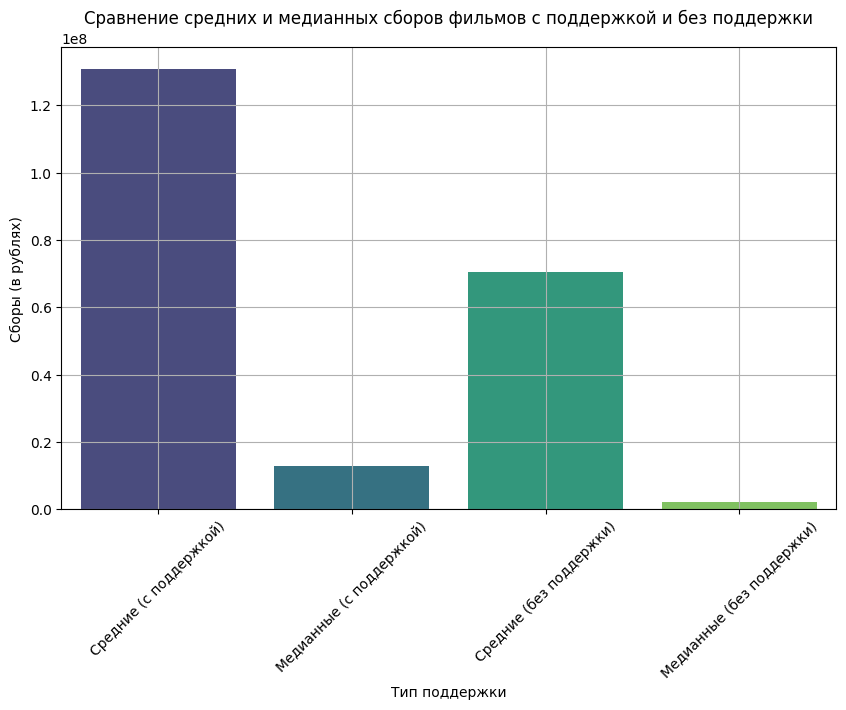

In [75]:
# Вычисление средних и медианных сборов для фильмов с поддержкой
funded_stats = rus_film_funded_state['box_office'].agg(['mean', 'median'])
funded_stats.index = ['Средние (с поддержкой)', 'Медианные (с поддержкой)']

# Вычисление средних и медианных сборов для фильмов без поддержки
not_funded_stats = rus_film_not_funded_state['box_office'].agg(['mean', 'median'])
not_funded_stats.index = ['Средние (без поддержки)', 'Медианные (без поддержки)']

# Объединение данных в один DataFrame для удобства визуализации
combined_stats = pd.concat([funded_stats, not_funded_stats])

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_stats.index, y=combined_stats.values, palette='viridis')

# Настройки графика
plt.title('Сравнение средних и медианных сборов фильмов с поддержкой и без поддержки')
plt.ylabel('Сборы (в рублях)')
plt.xlabel('Тип поддержки')
plt.xticks(rotation=45)
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе представленных данных о сборах фильмов с государственной поддержкой и без нее можно сделать следующие выводы:

1. **Сборы фильмов с поддержкой**:
   - Средние сборы фильмов с государственной поддержкой составляют около **130,7 млн рублей**. Это показывает, что в среднем фильмы, получившие поддержку, достигают значительных успехов в прокате.
   - Медианные сборы составляют **12,75 млн рублей**, что указывает на то, что половина всех фильмов с поддержкой собрала в прокате сумму менее этой цифры. Это значение ниже среднего, что может свидетельствовать о наличии нескольких фильмов с очень высокими сборами, которые поднимают среднее значение.

2. **Сборы фильмов без поддержки**:
   - Средние сборы фильмов без государственной поддержки составляют около **70,44 млн рублей**. Это почти вдвое меньше, чем у фильмов с поддержкой, что подчеркивает важность государственной помощи для достижения высоких кассовых сборов.
   - Медианные сборы составляют **2,03 млн рублей**, что значительно ниже, чем у фильмов с поддержкой. Это указывает на то, что большинство фильмов без государственной поддержки имеют гораздо более скромные кассовые результаты.

##### Итог:
Фильмы, получившие государственную поддержку, в среднем собирают больше в прокате по сравнению с теми, которые не получают такой поддержки. Это особенно заметно по сравнению медианных значений, где разница более чем в 6 раз. Однако медианные значения сборов для фильмов с поддержкой также показывают, что не все проекты, получившие финансирование, достигают высоких кассовых сборов, возможно, из-за больших различий в успехе отдельных фильмов.


In [76]:
# Средние и медианные рейтинги фильмов с поддержкой
rating_general_support = rus_film_funded_state['ratings'].agg(['mean', 'median'])

# Средние и медианные рейтинги фильмов без поддержки
rating_general_not_support = rus_film_not_funded_state['ratings'].agg(['mean', 'median'])

# Вывод результатов
print("Рейтинги фильмов с поддержкой:")
display(rating_general_support)

print("\nРейтинги фильмов без поддержки:")
display(rating_general_not_support)

Рейтинги фильмов с поддержкой:


mean     6.0
median   6.2
Name: ratings, dtype: float64


Рейтинги фильмов без поддержки:


mean     6.5
median   6.6
Name: ratings, dtype: float64

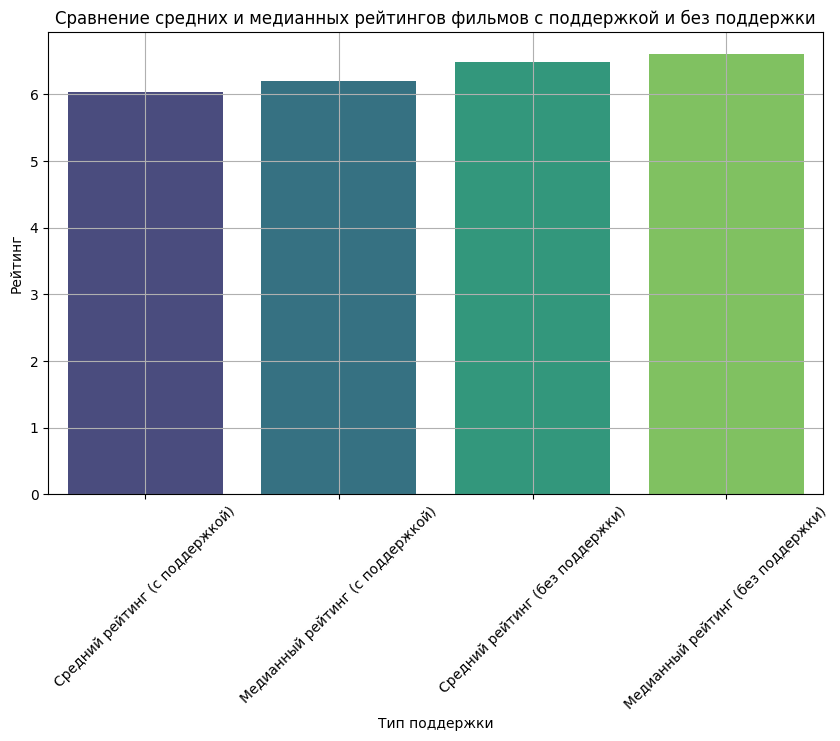

In [77]:
# Средние и медианные рейтинги фильмов с поддержкой
rating_general_support = rus_film_funded_state['ratings'].agg(['mean', 'median'])
rating_general_support.index = ['Средний рейтинг (с поддержкой)', 'Медианный рейтинг (с поддержкой)']

# Средние и медианные рейтинги фильмов без поддержки
rating_general_not_support = rus_film_not_funded_state['ratings'].agg(['mean', 'median'])
rating_general_not_support.index = ['Средний рейтинг (без поддержки)', 'Медианный рейтинг (без поддержки)']

# Объединение данных в один DataFrame для удобства визуализации
combined_ratings = pd.concat([rating_general_support, rating_general_not_support])

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_ratings.index, y=combined_ratings.values, palette='viridis')

# Настройки графика
plt.title('Сравнение средних и медианных рейтингов фильмов с поддержкой и без поддержки')
plt.ylabel('Рейтинг')
plt.xlabel('Тип поддержки')
plt.xticks(rotation=45)
plt.grid(True)

# Показ графика
plt.show()

##### Вывод:

На основе представленных данных о рейтингах фильмов с государственной поддержкой и без нее можно сделать следующие выводы:

1. **Рейтинги фильмов с поддержкой**:
   - Средний рейтинг фильмов с государственной поддержкой составляет **6.04**. Это показывает, что фильмы, получившие поддержку, в среднем оцениваются зрителями положительно, но не слишком высоко.
   - Медианный рейтинг составляет **6.20**, что также указывает на умеренно положительное восприятие этих фильмов зрителями.

2. **Рейтинги фильмов без поддержки**:
   - Средний рейтинг фильмов без государственной поддержки составляет **6.48**, что выше, чем у фильмов с поддержкой. Это говорит о том, что фильмы без поддержки в среднем оцениваются зрителями несколько лучше.
   - Медианный рейтинг составляет **6.60**, что также выше, чем у фильмов с поддержкой. Это подтверждает, что большинство фильмов без поддержки получают более высокие оценки от зрителей.

##### Итог:
Фильмы без государственной поддержки в среднем имеют более высокие рейтинги по сравнению с фильмами, получившими такую поддержку. Разница в рейтингах, как средних, так и медианных, может указывать на то, что государственная поддержка не всегда связана с высоким качеством или популярностью фильмов среди зрителей. Фильмы без поддержки могут быть более независимыми в своем творческом подходе, что возможно способствует более высоким оценкам.


## Общий вывод


На основе проведенного анализа можно сделать следующие ключевые выводы:

1. **Влияние возрастных ограничений на сборы фильмов**:
   - **Возрастное ограничение оказывает значительное влияние на кассовые сборы фильмов**. В период с 2015 по 2019 год фильмы с возрастным ограничением "16+" собрали наибольшую сумму в прокате, составляя 73,58 млрд рублей, что делает эту категорию самой прибыльной.
   - **Фильмы с возрастным ограничением "6+" и "12+"** также показали высокие результаты, особенно в 2017 и 2018 годах, когда они доминировали в сборе кассовых доходов. Эти категории ориентированы на семейную и подростковую аудиторию, что делает их особенно успешными.
   - Фильмы с возрастным ограничением "18+" и "0+" показали более стабильные, но менее значительные результаты, что можно объяснить узкой целевой аудиторией и менее агрессивным маркетингом.

2. **Государственная поддержка фильмов**:
   - **Фонд кино** является основным источником финансирования российских фильмов, выделяя наибольшие суммы, особенно на проекты, рассчитанные на массовую аудиторию. Однако, несмотря на значительную поддержку, многие фильмы, получившие государственное финансирование, не окупились.
   - **Министерство культуры** и его совместная поддержка с Фондом кино также играют важную роль, особенно в поддержке культурно значимых фильмов. Тем не менее, результаты показывают высокий уровень риска, так как значительная часть поддержанных проектов оказалась убыточной.
   - **Фильмы без государственной поддержки** демонстрируют более высокие рейтинги, что может свидетельствовать о том, что такие фильмы обладают большей творческой свободой и привлекательностью для зрителей.

3. **Распределение по годам и жанровой анализ**:
   - **Наиболее продуктивными в плане выделения средств были 2013 и 2017 годы**. Это могло быть связано с экономическими условиями или изменениями в приоритетах поддержки киноиндустрии.
   - Жанровой анализ показал, что **драма и комедия** получили наибольшее количество государственной поддержки, но часто не окупались, в то время как **мультфильмы** показали высокую окупаемость, несмотря на меньшее количество проектов.

##### Итог:
Государственная поддержка оказывает значительное влияние на кассовые сборы и развитие российской киноиндустрии, однако эффективность этой поддержки варьируется в зависимости от жанра и возраста целевой аудитории фильма. При этом важно учитывать, что фильмы, созданные без государственной поддержки, часто получают более высокие оценки от зрителей, что может свидетельствовать о важности творческой свободы и креативного подхода. В будущем важно стратегически подходить к распределению государственных средств, чтобы максимизировать успех и окупаемость кинопроектов, а также поддерживать фильмы с высоким культурным потенциалом.
